# Исследование успешности продаваемых игр интернет-магазина 

**Цель:**

Найти потенциально популярные продукты для повышения продаж и планирования рекламных компаний.

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation), а также информация о возрастном рейтинге компьютерных игр. Необходимо выявить определяющие успешность игры закономерности. 

#### План работы

- Выгрузить данные из датафрейма и изучить их;
- Подготовить данные для анализа:
    - Проверить и привести к нижнему регистру названия столбцов, если необходимо; 
    - Проверить и изменить типы данных стобцов, если есть несоответствия;
    - Проверить и обработать пропуски, если они есть;
    - Проверить и обработать явные и неявные дубликаты, если они есть;
    - Посчитать суммарные продажи во всех регионах и записать результаты в отдельный столбец;
- Провести исследовательский анализ данных: 
    - Просмотреть сколько игр выпускалось в разные годы и определить важность этих периодов;
    - Посмотреть как менялись продажи по платформам и определить срок появления и исчезания платформ;
    - Проверить какие платформы лидируют по продажам, растут или падают в актуальном периоде;
    - Построить диаграмму размаха по глобальным продажам игр;
    - Определить как на продажу внутри одной популярной платформы влияют отзывы пользователей и критиков;
    - Сравнить продажи игр на других платформах;
    - Определить какие жанры являются наиболее прибыльными;
- Составить портрет пользователей по каждому региону:
    - Определить для каждого региона топ 5 популярных платформ;
    - Определить для каждого региона топ 5 жанров;
    - Узнать влияет ли рейтинг ESRB на продажи в регионе;
- Произвести проверку гипотез:
    - Проверить, являются ли одинаковыми средние пользовательские рейтинги платформ Xbox One и PC;
    - Проверить являются ли разными средние пользовательские рейтинги жанров Action и Sports;
- Сделать общий вывод.

###  Выгрузка данных

Подключим необходимые библиотеки.

In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import sqrt
from scipy.stats import norm
from scipy.stats import binom
import statistics

Выгрузим данные из файла и выведем на экран первые 10 записей.

In [2]:
games = pd.read_csv('dataset/games.csv')
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**При первичном изучении данных можно заметить:**
- Названия столбцов не соответствуют стилю `snake case`, необходимо будет привести все названия столбцов к нижнему регистру;    
- Несоответствия типов данных: в столбцу `Year_of_Release` тип float необходимо будет заменить на целочисленный тип, в столбце `Critic_Score` также необходимо будет заменить тип на целочисленный;    
- В столбцах разное количество ненулевых элементов, в некоторых столбцах, например, `Critic_Score`, `User_Score`, `Rating` много пропущенных значений;

### Предобработка данных

Для начала приведем все названия столбцов к нижнему регистру.

In [4]:
games.columns = [x.lower() for x in games.columns]

Поменяем типы данных в некоторых столбцах и выведем информацию на экран.


In [5]:
games['year_of_release'] = games['year_of_release'].astype('Int32')
games['critic_score'] = games['critic_score'].astype('Int32')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int32  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int32(2), float64(4), object(5)
memory usage: 1.3+ MB


In [6]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN


В столбцах `critic_score` и `year_of_release` типы данных были заменены с вещественного на целочисленный. В первом случае столбец хранит значения рейтинга максимальное число 100, при этом значения этого рейтинга целые. В другом столбце хранятся значения года выпуска игры, так как год не может быть вещественным числом, его тип также был заменен на целый.

Проверим количество пропущеных значений в столбцах.


In [7]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

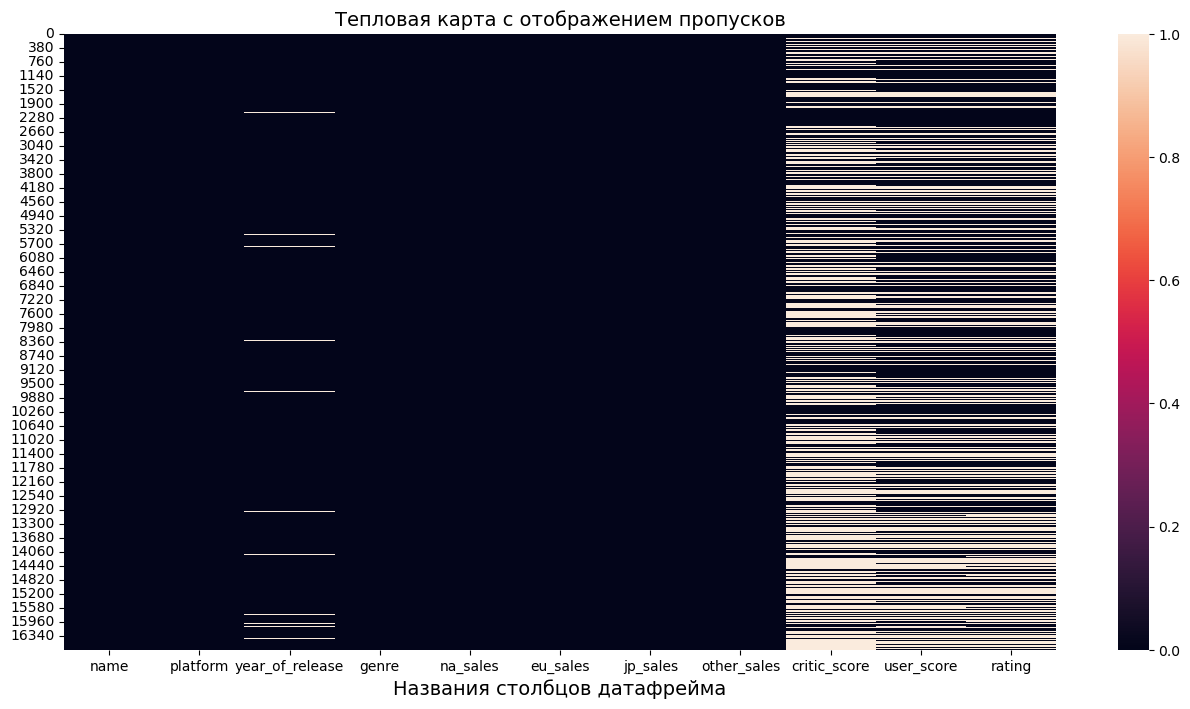

In [8]:
plt.figure(figsize=(16, 8))
sns.heatmap(games.isna(), cbar=True)
plt.title('Тепловая карта с отображением пропусков', fontsize=14)
plt.xlabel('Названия столбцов датафрейма', fontsize=14)
plt.show()

Как видим из представленной выше информации, в 5 столбцах присутствуют пропуски: 

- В столбце `name` пропуски можно будет удалить, так как их всего 2 ( а это не критичное значение), к тому же имя является ключевым значением для будущего анализа и без имени мы не сможем сделать этот анализ. Причина по которой мог возникнуть данный пропуск: это поле изначально не заполнили информацией;

- В столбце `year_of_release` также есть пропуски. Они могли возникнуть от того, что информация с годом выпуска игры не была заполнена пользователем. Игра с одним и тем же названием могла выходить в разные года, заполнить пропуски по названию игры будет не корректно. Так как пропусков в данном столбце не так много, удалим их; 

- В столбце `genre` всего 2 пропуска. Сложно будет точно определить какой жанр может соответствовать игре, поэтому пропуски в этом столбце также удалим;

- В столбце `critical_score` больше всего пропущенных значений. Пропуски могут быть от того, что игра есть уже на площадке, а критики ее не оценивали, либо от того, что игру заранее выложили на платформу, но сама игра еще не доступна для продажи и игры (ее премьера может быть позже, доступно только превью). Пропуски в данном случае нельзя заменять нулевыми значениями, так как нулевые рейтинги могут быть у плохих игр, но если игра новая и ее оценка критиков еще недоступна, то если такое пустое значение мы заменим нулевым, оно может исказить данные. В данном случае мы не можем корректно заполнить пропуски, так как если будем смотреть по названию игры и заполнять рейтинг аналогичным значением рейтинга этой игра на другой платформе, данные также будут искажаться, потому рейтинги критиков на разных платформах могут иметь ра разную оценку. В этом столбце пропуски не обрабатываем;

- В столбце `user_score` также много пропусков. Но в отличие от оценки критиков, оценка пользователей - динамическая, она может меняться от многих факторов. Также в данном столбце помимо пропусков присутствует значение tbd - на уточнении. Это может значить то, что рейтинг пользователей еще не рассчитался, например, по той причине, что в текущий момент большое количество пользователей оценивает данную игру, и нужно время для подсчета рейтинга пользователей.По сути tbd в текущий момент - это тоже пропуск, так как конкретного значения у него нет, можем заменить его на NaN. Пропуски могут быть от того, что данную игру пользователи не оценивали, или от того, что игра есть на платформе, но официально еще не вышла, поэтому оценка игры пользователями еще недоступна. Заменять такие пропуски 0 значениями не нужно, потому что нулевые рейтинги могут быть у плохих игр, в данном случае это будет мещать корректно истолковать данные. В данном столбце не обрабатываем пропуски, а поля со значением tbd меняем на NaN;

- В столбце `rating` тоже есть пропуски. В данном столбце хранится рейтинг определяющий возрастную категорию компьютерной игры. Рейтинг возрастной категрии может отсутствовать по разным причинам, но мы не можем точно определить рейтинг игры по другим столбцам, поэтому точно заполнить пропуски мы не можем. В данном столбце можем заменить все пропуски на значение 'undefined'.

In [9]:
#Запишем в переменную размер таблицы до изменения в ней
games_len_before_manipulation = len(games)
print('Размер таблицы до проведения манипуляций:', games_len_before_manipulation)

Размер таблицы до проведения манипуляций: 16715


In [10]:
#Удаляем пропуски в столбце с названиями игр 'name' и жанром 'genre' и 'year_of_release'
games = games.dropna(subset=['name'])
games = games.dropna(subset=['genre'])
games = games.dropna(subset=['year_of_release'])
print('Проверяем как именилось количество нулевых значений в столбцах:\n', games.isna().sum())

Проверяем как именилось количество нулевых значений в столбцах:
 name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64


Проверим сколько значений в столбце `user_score` имеют значение 'tbd'.

In [11]:
print('Количество значений равные "tbd" равно', games[games['user_score'] == 'tbd']['user_score'].count())

Количество значений равные "tbd" равно 2376


In [12]:
#Заменим значение tbd в столбце 'user_score' на NaN
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
print('Количество значений равные "tbd" равно', games[games['user_score'] == 'tbd']['user_score'].count())

#Заменим пропуски в столбце 'rating' на undefind
games['rating'] = games['rating'].fillna(value='undefined')
print('Проверяем как именилось количество нулевых значений в столбцах:\n', games.isna().sum())

Количество значений равные "tbd" равно 0
Проверяем как именилось количество нулевых значений в столбцах:
 name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64


Количество нулевых значений в столбцу `user_score` вырасло на 2376 значений, именно такое количество ячеек в столбце имело значение 'tbd'. В столбце `rating` ушли пропуски, так как они были заменены на значение 'undefind'. В остальных столбцах пропуски также были удалены.

Сравним как сильно изменился размер таблицы.

In [13]:
#Запишем в переменную размер таблицы до изменения в ней
games_len_after_del_nan = len(games)
print('Размер таблицы после обработки пропусков:', games_len_after_del_nan)

Размер таблицы после обработки пропусков: 16444


Проверим какой процент данных мы потеряли.

In [14]:
print('Было удалено',round((games_len_before_manipulation / games_len_after_del_nan * 100 - 100), 2),\
      '% данных')

Было удалено 1.65 % данных


После удаления пропусков, проверим за какой период у нас представлены данные в таблице. 

In [15]:
print('В таблице представлены данные за:', sorted(games['year_of_release'].unique()),' года')

В таблице представлены данные за: [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]  года


В таблице представлены данные по всем годам начиная с 1980 и заканчивая 2016 годом.

Теперь проверим есть ли в таблице явные и неявные дубликаты. Сначала проверим полные дубликаты по всей таблице.

In [16]:
games.duplicated().sum()

0

Полные дубликаты в таблице отсутствуют. Проверим есть ли дубликаты игр на разных платформах.


In [17]:
games[['name', 'platform', 'year_of_release']].duplicated().sum()

1

In [18]:
#Выведем на экран дубликат в котором совпадают значения в трех столбцах, по названию игры,
# платформе и году релиза
games[games[['name', 'platform', 'year_of_release']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83,5.5,E


В нашем случае дубликатом оказалась только 1 строка. Ее можно удалить, так как она будет мешать анализу и потери данных в данном случае не критичны.

In [19]:
games[['name', 'platform', 'year_of_release']] = \
games[['name', 'platform', 'year_of_release']].drop_duplicates()

In [20]:
games[['name', 'platform', 'year_of_release']].duplicated().sum()

0

In [21]:
games.isna().sum()

name                  1
platform              1
year_of_release       1
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Ранее в столбцах с платформами, названием игры и годом выпуска мы уже удаляли пропуски, но после удаления дубликата, в этих столбцах образовались пустые значения. Обработаем их.

In [22]:
games = games.dropna(subset=['platform'])
games = games.dropna(subset=['year_of_release'])
games = games.dropna(subset=['name'])

Проверим количество уникальных значений в столбцах с названием игр, платформой и годом релиза.

In [23]:
games[['name', 'platform', 'year_of_release']].nunique()

name               11426
platform              31
year_of_release       37
dtype: int64

Ранее мы выводили уникальный список с годами релизов игр, и неявных дубликатов там не было. Выведем уникальные значения для столбцов `platform` и `name`. Проверим, есть ли в этих столбцах неявные дубликаты.

In [24]:
sorted(games['platform'].unique())

['2600',
 '3DO',
 '3DS',
 'DC',
 'DS',
 'GB',
 'GBA',
 'GC',
 'GEN',
 'GG',
 'N64',
 'NES',
 'NG',
 'PC',
 'PCFX',
 'PS',
 'PS2',
 'PS3',
 'PS4',
 'PSP',
 'PSV',
 'SAT',
 'SCD',
 'SNES',
 'TG16',
 'WS',
 'Wii',
 'WiiU',
 'X360',
 'XB',
 'XOne']

В столбце с платформами неявные дубликаты отсутствуют. Проверяем столбец `name`.

In [25]:
sorted(games['name'].unique())

[' Beyblade Burst',
 ' Fire Emblem Fates',
 " Frozen: Olaf's Quest",
 ' Haikyu!! Cross Team Match!',
 ' Tales of Xillia 2',
 "'98 Koshien",
 '.hack//G.U. Vol.1//Rebirth',
 '.hack//G.U. Vol.2//Reminisce',
 '.hack//G.U. Vol.2//Reminisce (jp sales)',
 '.hack//G.U. Vol.3//Redemption',
 '.hack//Infection Part 1',
 '.hack//Link',
 '.hack//Mutation Part 2',
 '.hack//Outbreak Part 3',
 '.hack//Quarantine Part 4: The Final Chapter',
 '.hack: Sekai no Mukou ni + Versus',
 '007 Racing',
 '007: Quantum of Solace',
 '007: The World is not Enough',
 '007: Tomorrow Never Dies',
 '1 vs. 100',
 '1/2 Summer +',
 '10 Minute Solution',
 '100 All-Time Favorites',
 '100 Classic Books',
 '100 Classic Games',
 '1000 Cooking Recipes from ELLE à table',
 '1001 Touch Games',
 '101-in-1 Explosive Megamix',
 '101-in-1 Party Megamix Wii',
 '101-in-1 Sports Megamix',
 '101-in-1 Sports Party Megamix',
 '1080°: TenEighty Snowboarding',
 '11eyes: CrossOver',
 '12-Sai. Honto no Kimochi',
 '12-Sai. Koisuru Diary',
 '12Ri

In [26]:
games['name'].sort_values().head(20).unique()

array([' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest",
       ' Haikyu!! Cross Team Match!', ' Tales of Xillia 2', "'98 Koshien",
       '.hack//G.U. Vol.1//Rebirth', '.hack//G.U. Vol.2//Reminisce',
       '.hack//G.U. Vol.2//Reminisce (jp sales)',
       '.hack//G.U. Vol.3//Redemption', '.hack//Infection Part 1',
       '.hack//Link', '.hack//Mutation Part 2', '.hack//Outbreak Part 3',
       '.hack//Quarantine Part 4: The Final Chapter',
       '.hack: Sekai no Mukou ni + Versus', '007 Racing',
       '007: Quantum of Solace'], dtype=object)

В некоторых названиях встречается разное написание японской версии игры. Где-то пишется 'jp sales', а где-то 'JP sales'. Приведем все к одному виду.

In [27]:
games['name'] = games['name'].str.replace('jp', 'JP')

Посчитаем и запишем в отдельный столбец суммарные продажи во всех регионах.


In [28]:
games['sales_total'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,undefined,31.38


#### Вывод

В текущем разделе была проведена предобработка данных:
- Были проверены и заменены типы данных столбцов с годом релиза игры и оценкой критиков в датафрейме;
- Было выяснено за какой период представлены данные в таблице;
- Была произведена проверка и устранение пропусков данных в таблице;
- Была произведена проверка и устранение явных и неявных дубликатов;
- Был добавлен новый столбец с суммарными продажами игры по всем регионам.

### Исследовательский анализ данных

#### Сколько игр выпускалось в разные года
Проверим, сколько игр выпускалось в разные года.

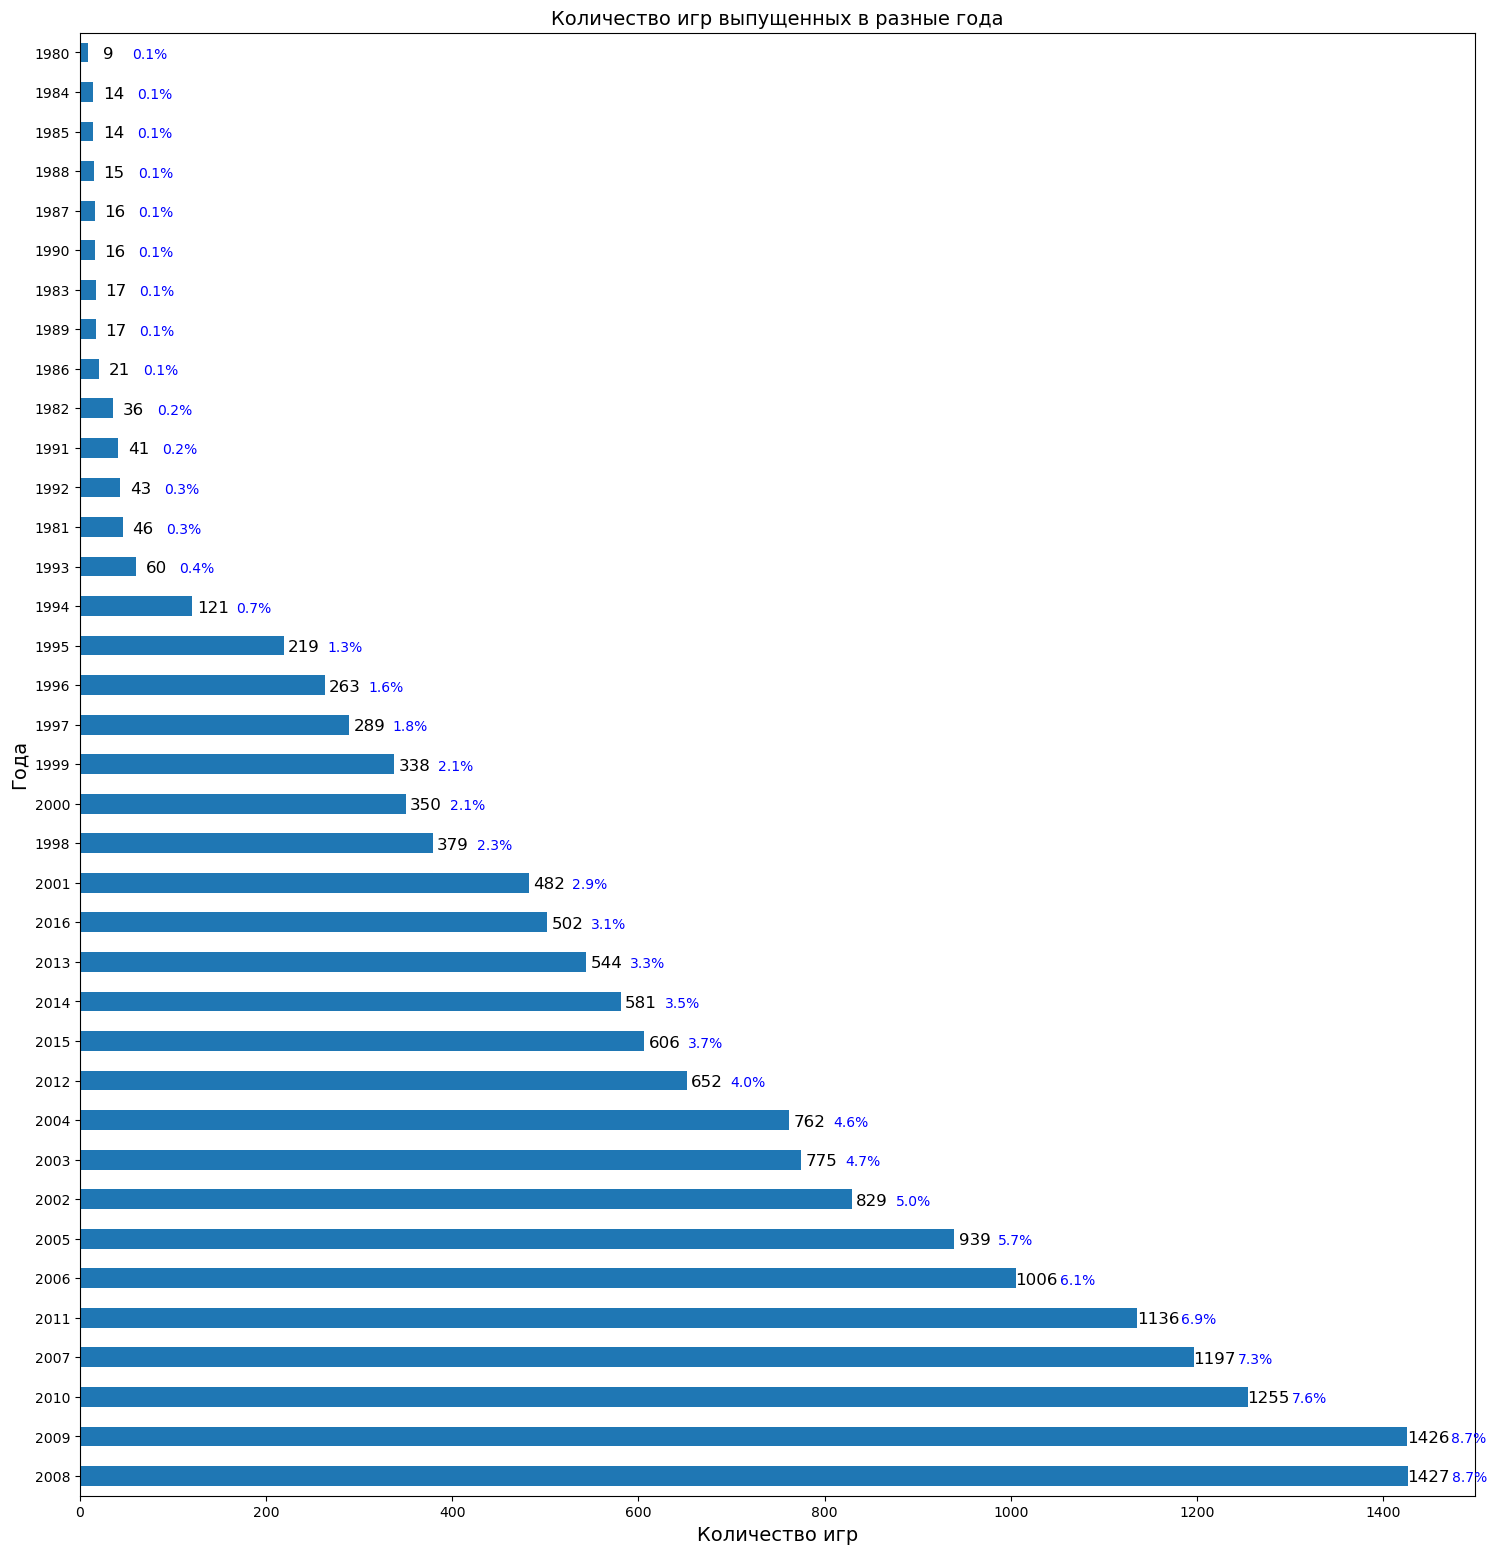

In [29]:
games['year_of_release'].value_counts(ascending=False).plot(kind='barh', figsize=(18, 19))
total = games['year_of_release'].count()
for i, v in enumerate(games['year_of_release'].value_counts()):
    plt.text(v+22, i-0.15, str(round(v, 2)), ha = 'center', size = 12)
    plt.text(v+85, i-0.15, str("{:.1%}".format(v/total)), ha='right', color="b", size=10)
plt.title('Количество игр выпущенных в разные года', fontsize=14)
plt.ylabel('Года', fontsize=14)
plt.xlabel('Количество игр', fontsize=14)
plt.show()

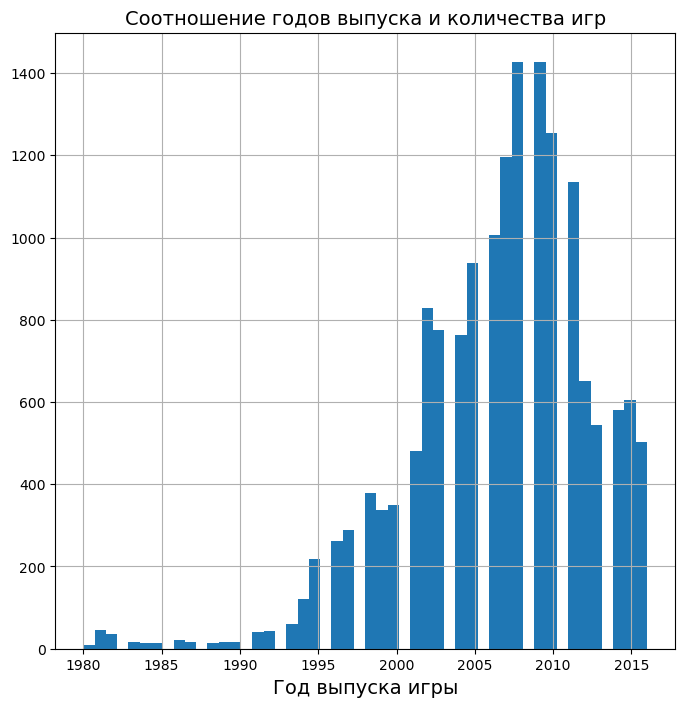

In [30]:
games['year_of_release'].hist(bins=50, figsize=(8, 8))
plt.title('Соотношение годов выпуска и количества игр', fontsize=14)
plt.xlabel('Год выпуска игры', fontsize=14)
plt.show()

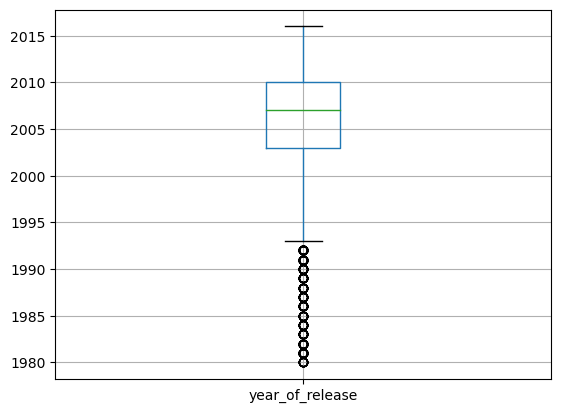

In [31]:
#Объявим функцию для построения отдельных графиков диаграммы размаха
def plot_boxplot(data_frame, column_name):
    data_frame.boxplot(column=[column_name])
    plt.grid(True)
    plt.show()
plot_boxplot(games, 'year_of_release')

По столбчатой диаграмме можно заметить, что рост производства компьютерных игр начался с 1995 года, в предыдущие года производство игр было минимальное. На диаграмме размаха эти значения находятся за первой квартилью, такие значения можно не учитывать в данном случае.

Наибольшее количество игр было выпущено в 2008 и 2009 годах. После 2010 года выпуск игр опять начал уменьшаться, и в 2016 году было выпущено практически столько же игр как и в 2001. 

Посмотрим в процентном соотношении на сколько выросло производство игр по сравнению с 1994 до 2009, с 2001 до 2009 и как потом упало производство с 2009 до 2016 года. 

Уберем эти аномальные значения.

In [32]:
games = games.query('year_of_release >= 1994', engine='python')

In [33]:
print('Размер датафрейма после удаления аномальных значений стал', len(games))

Размер датафрейма после удаления аномальных значений стал 16078


In [34]:
#Сравним размер датафрейма
print('Было удалено',round((games_len_before_manipulation / len(games) * 100 - 100), 2),\
      '% данных всего')

Было удалено 3.96 % данных всего


In [35]:
years_diff_one = (games['year_of_release']==2009).sum() / \
(games['year_of_release']==1995).sum() * 100 - 100

years_diff_two = (games['year_of_release']==2009).sum() / \
(games['year_of_release']==2016).sum() * 100 - 100

years_diff_three = (games['year_of_release']==2009).sum() / \
(games['year_of_release']==2001).sum() * 100 - 100

print('Количество выпущенных игр в 2009 году было на',
      round(years_diff_one, 2), '% больше чем в 1995 году.')
print('Количество выпущенных игр в 2009 году было на',
      round(years_diff_two, 2), '% больше чем в 2016 году.')
print('Количество выпущенных игр в 2009 году было на',
      round(years_diff_three, 2), '% больше чем в 2001 году.')

Количество выпущенных игр в 2009 году было на 551.14 % больше чем в 1995 году.
Количество выпущенных игр в 2009 году было на 184.06 % больше чем в 2016 году.
Количество выпущенных игр в 2009 году было на 195.85 % больше чем в 2001 году.


**Вывод:**

Можно сделать вывод, что данными до 1995 года можно пренебречь, так как их очень мало. В это же время можем заметить, что производство в 2001 году действительно было приблезительно равно производству игр в 2016 году, а пик проигводства игр был в 2008 и 2009 годах.

Так как в таблице представлены данные до 2016 года, то многие данные за предыдущие года уже могут быть не актуальны, поэтому для следующих этапов анализа будут браться данные начиная с 2014 года и до 2016, то есть за последние 3 года.

#### Как менялись продажи по платформам
Определим актуальный перид для прогноза на 2017 год. Так как данные представлены за долгие годы, то много платформ могут быть устаревшими, проверим те платформы, которые актуальны на 2016 год. Для анализа возьмем данные с 2014 года вкючительно, то есть за последние 3 года. Также определим платформы с максимальными суммарными продажами за актуальный период.

Но для начала проверим суммарные продажи за весь период, представленный в таблице, а потом сделаем срез данных по актуальному периоду и продолжим работать с ними.

In [36]:
#Сделаем сводную таблицу за весь период с сумарными продажами по платформам
sales_all_time_pivot = games.pivot_table(index='platform',\
                                   values='sales_total', aggfunc='sum')
sales_all_time_pivot = sales_all_time_pivot.reset_index() 
sales_all_time_pivot.sort_values(by='sales_total', ascending=False)

,platform,sales_total
14,PS2,1233.56
26,X360,961.24
15,PS3,931.33
24,Wii,891.18
3,DS,802.76
13,PS,727.58
16,PS4,314.14
5,GBA,312.88
17,PSP,289.53
1,3DS,257.81


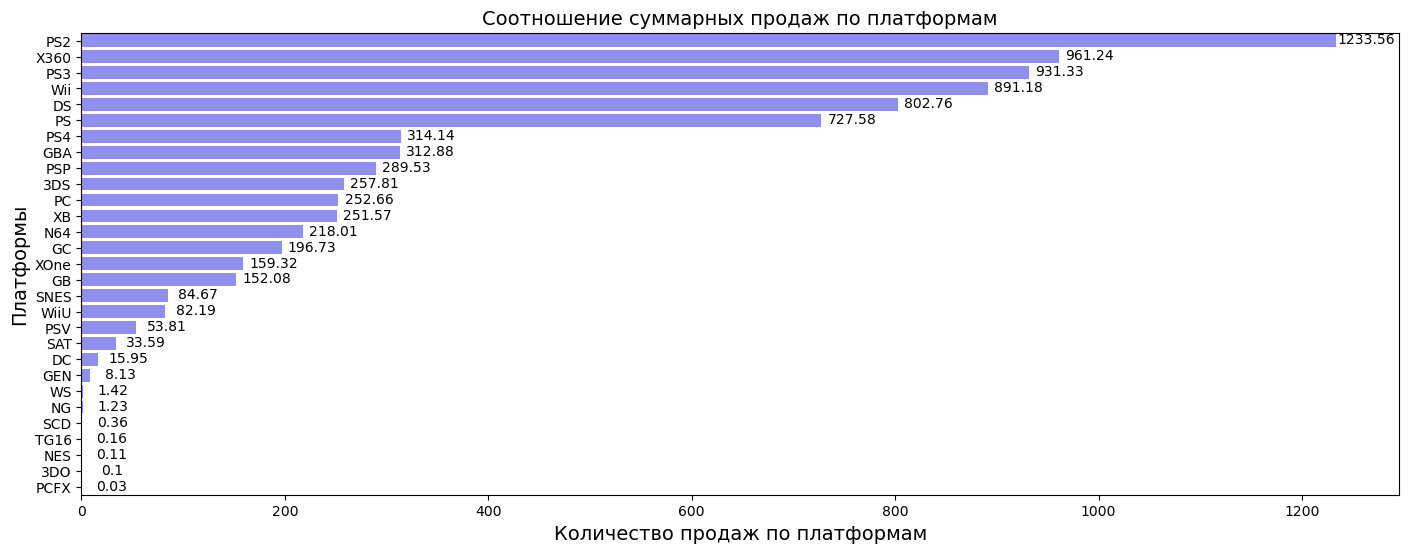

In [37]:
#Построим график соотношения количества проданных игр по платформам за весь период
sales_all_time_sort = sales_all_time_pivot.copy().sort_values(by='sales_total', ascending=False)
plt.figure(figsize=(17, 6))
sns.barplot(data=sales_all_time_sort, x='sales_total', y='platform', color='blue', alpha=0.5)
for i, v in enumerate(sales_all_time_sort['sales_total']):
    plt.text(v+30, i+0.2, str(round(v, 2)), ha = 'center', size = 10)
plt.title('Соотношение суммарных продаж по платформам', fontsize=14)
plt.ylabel('Платформы', fontsize=14)
plt.xlabel('Количество продаж по платформам', fontsize=14)
plt.show()

Самыми популярными платформами за все время были 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'. Из них лидирующей по продажам игр платформой была 'PS2'.

Теперь выясним, какие платформы популярны в актуальном периоде, за последние 3 года.


In [38]:
#Создаем таблицу где будут данные за актуальный период
current_period = games.query('year_of_release >= 2014', engine='python')

In [39]:
sales_total_platforms_pivot = current_period.pivot_table(index='platform',\
                                                                values='sales_total', aggfunc='sum')
sales_total_platforms_pivot = sales_total_platforms_pivot.reset_index()
sales_total_platforms_pivot.head()

,platform,sales_total
0,3DS,86.68
1,PC,27.05
2,PS3,68.18
3,PS4,288.15
4,PSP,0.36


In [40]:
sales_total_platforms_pivot.sort_values(by='sales_total', ascending=False)

,platform,sales_total
3,PS4,288.15
9,XOne,140.36
0,3DS,86.68
2,PS3,68.18
8,X360,48.22
7,WiiU,42.98
1,PC,27.05
5,PSV,22.40
6,Wii,5.07
4,PSP,0.36


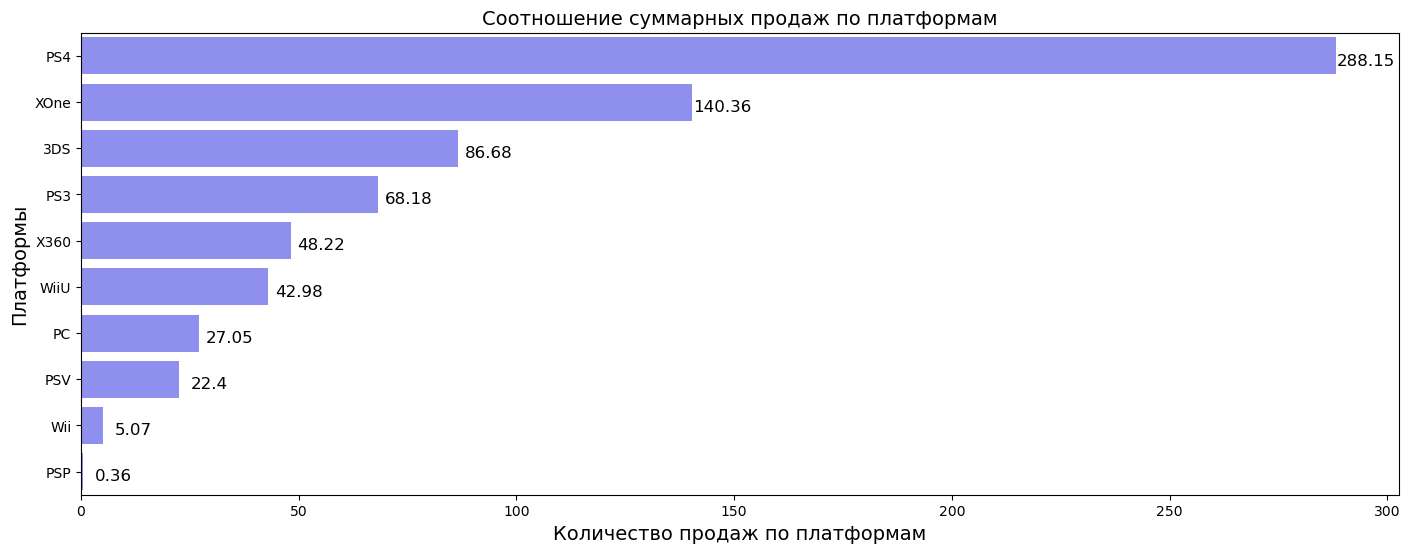

In [41]:
#Построим график соотношения количества проданных игр по платформам
sales_total_platforms_sort = sales_total_platforms_pivot.copy().sort_values(by='sales_total', ascending=False)
plt.figure(figsize=(17, 6))
sns.barplot(data=sales_total_platforms_sort, x='sales_total', y='platform', color='blue', alpha=0.5)
for i, v in enumerate(sales_total_platforms_sort['sales_total']):
    plt.text(v+7, i+0.2, str(round(v, 2)), ha = 'center', size = 12)
plt.title('Соотношение суммарных продаж по платформам', fontsize=14)
plt.ylabel('Платформы', fontsize=14)
plt.xlabel('Количество продаж по платформам', fontsize=14)
plt.show()

Самыми популярными платформами за последние 4 года оказались: 'PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU'. При этом лидирует 'PS4'. Построим по ним графики распределения выручки по годам.

In [42]:
#Напишем функцию для создания сводных таблиц для каждой из платформ 
#А также автоматизируем построение графиков
class color:
    bold = '\033[1m'
    red = '\033[91m'
    end = '\033[0m'
    
def popular_platforms_pivots(platform_list):
    for platform_name in platform_list:
        table = games.query('platform == @platform_name')
        table_pivot = table.pivot_table(index='year_of_release', values='sales_total', aggfunc='sum')
        table_pivot = table_pivot.reset_index()
        table_pivot.columns = ['Год выпуска', 'Количество продаж']
        print(color.bold + color.red + 'Платформа', platform_name + color.end,'\n', table_pivot.head(15))
        table_pivot.plot(x='Год выпуска',
                     y='Количество продаж',
                     style='o-',
                     linewidth=3,
                     figsize=(7, 7))
        plt.minorticks_on()
        plt.grid(which='major')
        plt.grid(which='minor', ls=':')
        plt.title('Зависимость изменения продаж от года выпуска игры', fontsize=14)
        plt.xlabel('Год выпуска игры', fontsize=14)
        plt.ylabel('Количество продаж', fontsize=14)
        plt.show()

Платформа PS4 
    Год выпуска  Количество продаж
0         2013              25.99
1         2014             100.00
2         2015             118.90
3         2016              69.25


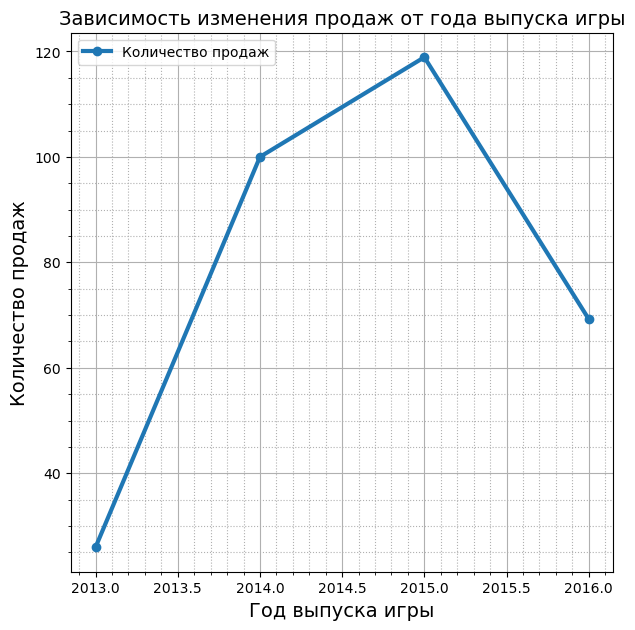

In [43]:
popular_platforms_pivots(['PS4'])

Платформа вышла в 2013 году и количесвто проданных экземпляров игр росло до 2015 года. После 2015 года продажи игр начали сокращаться, однако платформа все еще является популярной. Эта платформа живет только 4 года. Продажи имеются за посление 4 года, и в 2016 они еще не достигли нуля, значит игры еще продаются, платформа еще существует.


Платформа XOne 
    Год выпуска  Количество продаж
0         2013              18.96
1         2014              54.07
2         2015              60.14
3         2016              26.15


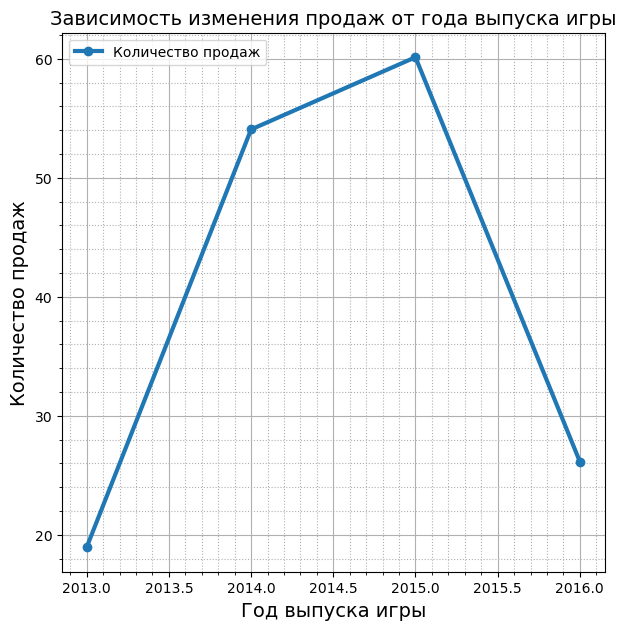

In [44]:
popular_platforms_pivots(['XOne'])

Платформа вышла примерно в 2013 году и продажи игр росли до 2015 года. Похожая ситуация как и с предыдущим графиком. Эта платформа живет 4 года. Продажи имеются за посление 4 года, и в 2016 они еще не достигли нуля, значит игры еще продаются, платформа еще существует.

Платформа 3DS 
    Год выпуска  Количество продаж
0         2011              63.20
1         2012              51.36
2         2013              56.57
3         2014              43.76
4         2015              27.78
5         2016              15.14


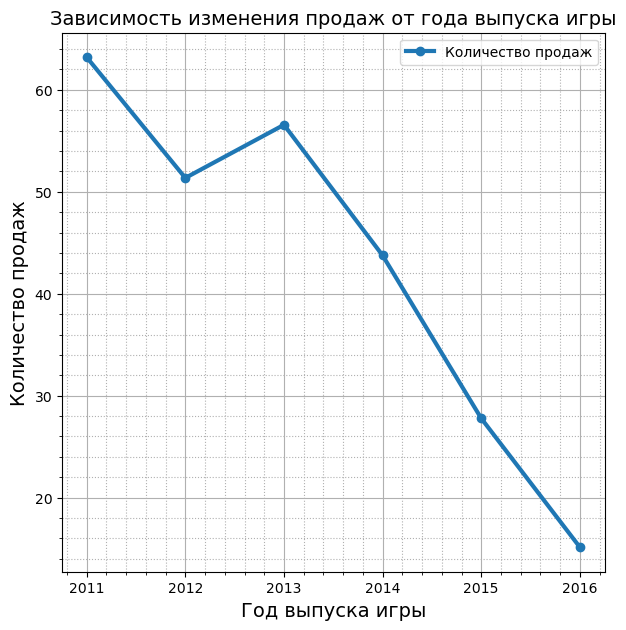

In [45]:
popular_platforms_pivots(['3DS'])

Платформа вышла в 2011 году и до 2013 продажи игр на нее были примерно на одном уровне, но после начали сильно снижаться. Эта платформа живет 6 лет. В таблице представлены данные за 6 лет. Продажи сильно сократились и близки к нулю, платформа близка к исчезновению.


Платформа PS3 
     Год выпуска  Количество продаж
0          2006              20.96
1          2007              73.19
2          2008             118.52
3          2009             130.93
4          2010             142.17
5          2011             156.78
6          2012             107.35
7          2013             113.25
8          2014              47.76
9          2015              16.82
10         2016               3.60


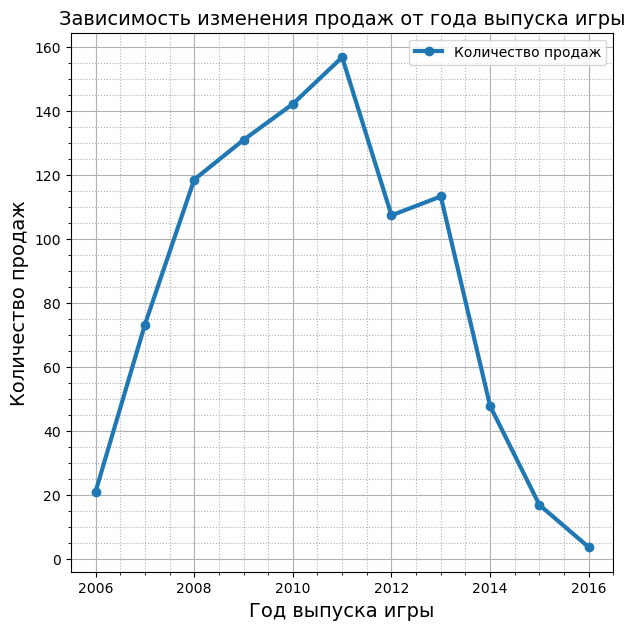

In [46]:
popular_platforms_pivots(['PS3'])

Платформа вышла в 2006 году и продажи игр на ней росли до 2011 года, потом продажи постепенно снижались. Эта платформа живет уже 11 лет. Продажи в 2016 году близки к нулю, можно сказать их практически нет. Платформа уже исчезает.

Платформа X360 
     Год выпуска  Количество продаж
0          2005               8.25
1          2006              51.62
2          2007              95.41
3          2008             135.26
4          2009             120.29
5          2010             170.03
6          2011             143.84
7          2012              99.74
8          2013              88.58
9          2014              34.74
10         2015              11.96
11         2016               1.52


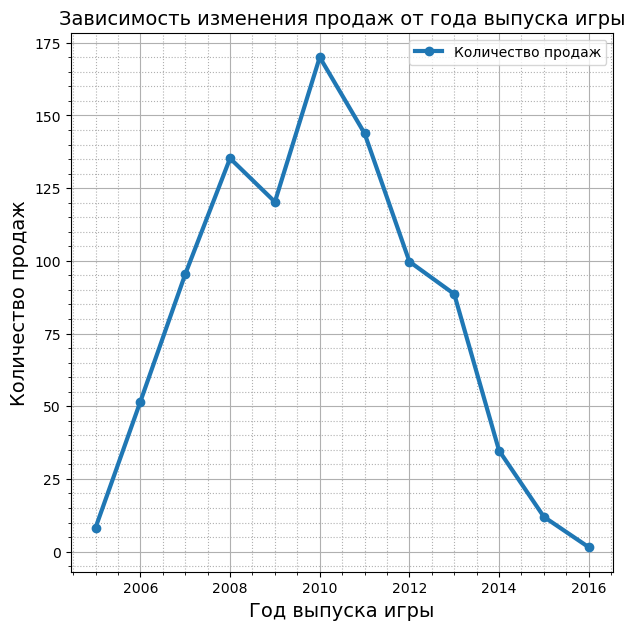

In [47]:
popular_platforms_pivots(['X360'])

Платформа вышла в 2005 году и продажи игр на ней росли до 2010 года. На период 2016 продажи игр на платформе очень снизились. Эта платформа живет уже 12 лет, за последний 2016 год продаж практически не было, плаформа исчезает.

Платформа WiiU 
    Год выпуска  Количество продаж
0         2012              17.56
1         2013              21.65
2         2014              22.03
3         2015              16.35
4         2016               4.60


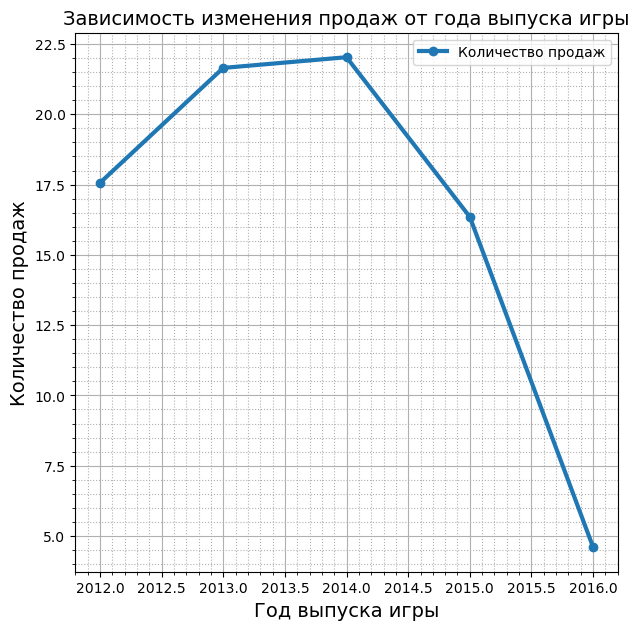

In [48]:
popular_platforms_pivots(['WiiU'])

Платформа вышла в 2012 году, продажи игр росли до 2014 года после чего начали падать. Данная платформа живет 5 лет и в 2016 продажи игр стремятся к нулю, платформа исчезает.

**Вывод:**

Можно заметить, что в среднем платформы живут от 5 до 12 лет, после этого периода количество проданных экземпляров игр стремится к нулю. 

При рассмотрении графиков тех платформ, чей срок жизни подошел или близок к концу, можно заметить, что от момента появления платформы, она имеет популярность равная половине срока ее существования. То есть после появления платформы продажи растут и пик продаж приходится примерно на середину цикла жизни платформы, потом продажи экземпляров игр идут на спад и стремятся к нулю.

Основываясь на текущих данных новые версии платформы появляются спустя 7-8 лет после выходя предыдущей версии платформы. Хорошо это видно на примере 'X360' и 'XOne', разница между появлениями платформ - 8 лет. Между появлением 'PS3' и 'PS4' разница 7 лет. Если считать общее время между появлениями новых платформ разных производителей, то новые платформы появляются карез 4 года.

На текущий момент самыми актуальными платформами, продажи игр на которых еще продолжаются, являются платформы 'PS4' и 'XOne'. Если опираться на графики, то эти платформы еще должны быть популярны как минимум 2 года. Также платформа '3DS' еще имеет небольшой потенциал, так как продажи в 2016 не совсем близки к нулю.

#### Лидирующие платформы

Выше мы уже нашли 6 плабформ с наибольшими суммарными продажами игр. Выяснили, что на текущий момент в плане продолжительности продаж наиболее благоприятны две платформы: 'PS4' и 'XOne' и '3DS' . Проверим какую долю по продажам занимает каждая из этих платформ., чтобы определить наиболее прибыльные.

In [49]:
sales_total_platforms_pivot.head()

,platform,sales_total
0,3DS,86.68
1,PC,27.05
2,PS3,68.18
3,PS4,288.15
4,PSP,0.36


In [50]:
# Оставим в таблице только платформы которые имели самые большие суммарные продажи
platform_list = ['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU']
sales_total_platforms_depens = sales_total_platforms_pivot.query('platform == @platform_list')

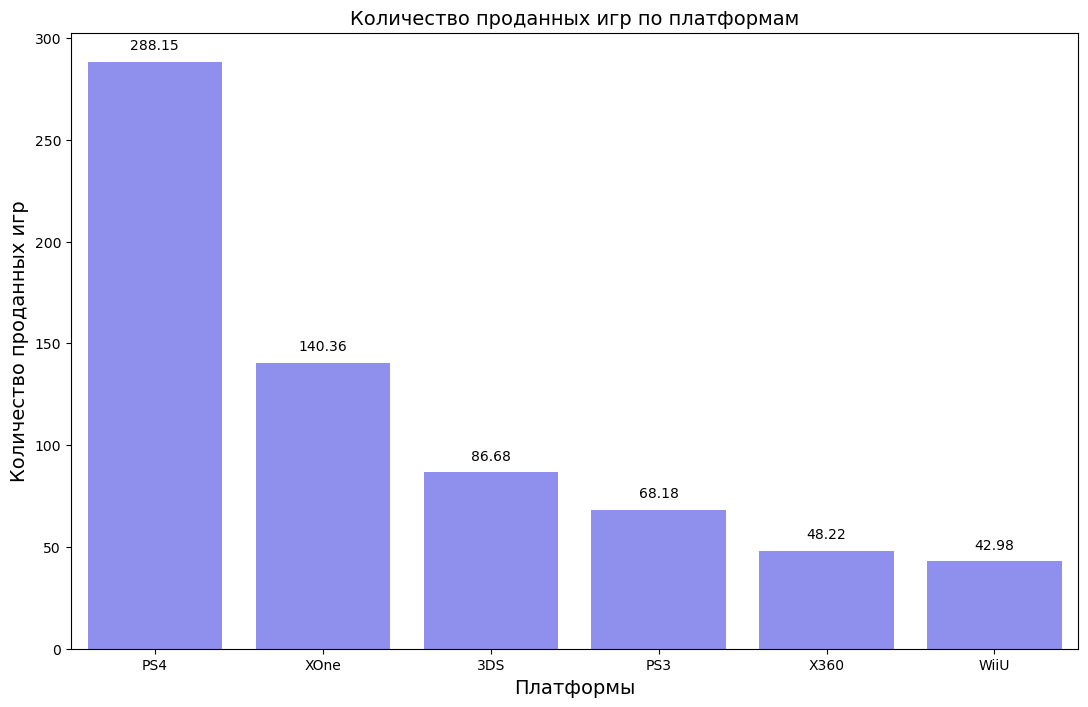

In [51]:
#Построим график показывающий соотношения платформ к количествупроданных игр по этим платформам
sales_total_platforms_depens_sort = sales_total_platforms_depens.copy()\
                                    .sort_values(by='sales_total', ascending=False)
plt.figure(figsize=(13, 8))
sns.barplot(data=sales_total_platforms_depens_sort, y='sales_total', x='platform', color='blue', alpha=0.5)
for i, v in enumerate(sales_total_platforms_depens_sort['sales_total']):
    plt.text(i, v+6, str(round(v, 2)), ha = 'center', size = 10)
plt.title('Количество проданных игр по платформам', fontsize=14)
plt.ylabel('Количество проданных игр', fontsize=14)
plt.xlabel('Платформы', fontsize=14)
plt.show()

Можно дополнить предыдущий вывод: помимо того, что 'PS4', 'XOne' и '3DS' все еще продолжают продавать игры и количество проданных экземпляров за 2016 год у этих платформ больше, чем у других. Также по данной диаграмме видим, что именно эти платформы являются лидирами по продажам игр.

Построим диаграмму размаха.


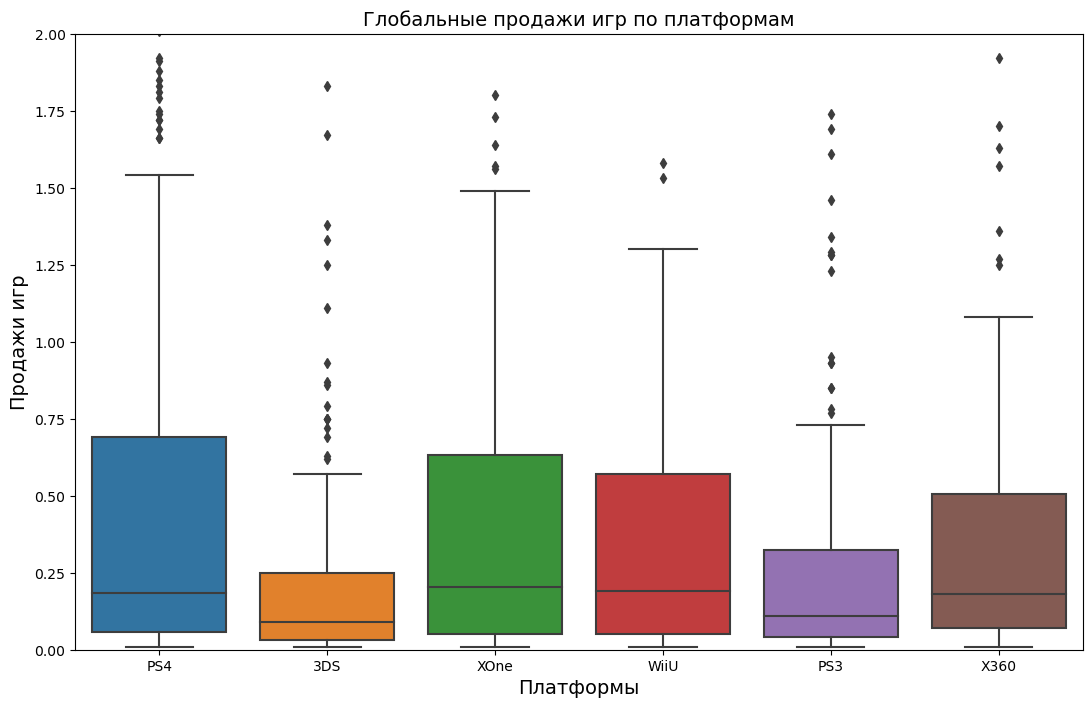

In [52]:
plt.figure(figsize=(13, 8))
#Использую таблицу "current_period" а  не "games" так как в первой стоит ограничение акутального периода
sns.boxplot(data = current_period.query('platform in @platform_list'), y='sales_total', x='platform')
plt.title('Глобальные продажи игр по платформам', fontsize=14)
plt.xlabel('Платформы', fontsize=14)
plt.ylabel('Продажи игр', fontsize=14)
plt.ylim(0, 2);

In [53]:
data_for_describe = current_period.query('platform in @platform_list')
data_for_describe.groupby('platform')['sales_total'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28
XOne,228.0,0.615614,1.046513,0.01,0.0500,0.205,0.6325,7.39


Посмотрим как распределены данные. 

Минимальное значение продаж у выбранных платформ одинаковое - все значения равны 0.01. Значения первой квартили  у '3DS' и 'PS3' - 0.03, у остальных от 0.05 до 0.06.

Медианное значение по продажам у большинства платформ находится на отметке примерно 0.17, кроме 'PS3' и '3DS' - их медианное значение несколько ниже - 0.08 и 0.09. 

Третяя квартиль в примерном одинаковом диапазоне также у всех кроме '3DS' и 'PS3' - их квартили меньше остальных в 2 раза (0.23 и 0.28), самые значения высокие у 'PS4', 'XOne' и 'WiiU'. Максимальные значения самые высокие у 'PS4' и '3DS', но такие высокие значения находятся далеко за третей квартилью и могут уже относиться к выбросам.

**Вывод:**

Можно сделать вывод, что наиболее лидирующие платформы - это 'PS4', 'XOne' и 'WiiU' по ним данные распределены более равномерно. При этом среди этих трех платформ самой лидирующей можно считать 'PS4', так как ее показатели все равно выше и лучше остальных платформ. 

#### Влияние отзывов на продажи

Проверим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. А также построим диаграмму рассеивания и посчитаем корреляцию между отзывами и продажами.

Напишем функции и построим графики зависимости оценки количества продаж от оценки пользователей и графики зависимости количества продаж от оценки критиков.

In [54]:
#Функция для проверки зависимости количества продаж от оценки пользователей
def score_sales_platforms_dep(platform_list):
    for platform_name in platform_list:
        table = current_period.query('platform == @platform_name')
        #По рейтингу суммируем продажи игр, чтобы на графике было общее количество проданных игр над рейтингом
        table_pivot = table.pivot_table(index='user_score', values='sales_total', aggfunc='sum')
        table_pivot = table_pivot.reset_index()  
        table_pivot.columns = ['Оценка пользователей', 'Количество продаж']
        print(color.bold + color.red + 'Платформа', platform_name + color.end,'\n', table_pivot.head(15))
        plt.figure(figsize=(17, 10))
        sns.scatterplot(data=table_pivot,
                     x='Оценка пользователей',
                     y='Количество продаж',
                     s=150,
                     color='g')
        plt.title('Зависимость продаж от оценок пользователей', fontsize=14)
        plt.xlabel('Оценки пользователей', fontsize=14)
        plt.ylabel('Продажи', fontsize=14)
        plt.show() 

In [55]:
#Функция для проверки зависимости количества продаж от оценки критиков
def critic_sales_platforms_dep(platform_list):
    for platform_name in platform_list:
        table = current_period.query('platform == @platform_name')
        table_pivot = table.pivot_table(index='critic_score', values='sales_total', aggfunc='sum')
        table_pivot = table_pivot.reset_index()        
        table_pivot.columns = ['Оценка критиков', 'Количество продаж']
        print(color.bold + color.red + 'Платформа', platform_name + color.end,'\n', table_pivot.head(15))
        plt.figure(figsize=(17, 10))
        sns.scatterplot(data=table_pivot,
                       x='Оценка критиков',
                       y='Количество продаж',
                       s=150,
                       color='m')
        plt.title('Зависимость продаж от оценки критиков', fontsize=14)
        plt.xlabel('Оценки критиков', fontsize=14)
        plt.ylabel('Продажи', fontsize=14)
        plt.show()

In [56]:
def pirson_cof(platform_list):
    for platform_name in platform_list:
        table = current_period.query('platform == @platform_name')
        table_critic = table.groupby('critic_score')['sales_total'].sum()
        table_critic = table_critic.reset_index()
        table_users = table.groupby('user_score')['sales_total'].sum()
        table_users = table_users.reset_index()
        print('Коэффициент пирсона:', table_critic['sales_total'].corr(table_users['sales_total']))

Так как по всем проведенные ранее проверкам платформа 'PS4' является самой лидирующей платформой, проверим на ее примере зависимость количества продаж от оценок критиков и пользователей. А затем сравним ее результаты с результатами по другим платформам.


Платформа PS4 
    Оценка пользователей  Количество продаж
0                   1.5               0.20
1                   1.9               0.06
2                     2               0.01
3                   2.3               0.01
4                     3               0.06
5                   3.3               0.30
6                   3.4               5.49
7                   3.5               0.05
8                   3.6               0.60
9                   3.7               0.51
10                  3.8               0.40
11                  4.1               0.25
12                  4.3               9.55
13                  4.5               1.71
14                  4.7               0.36


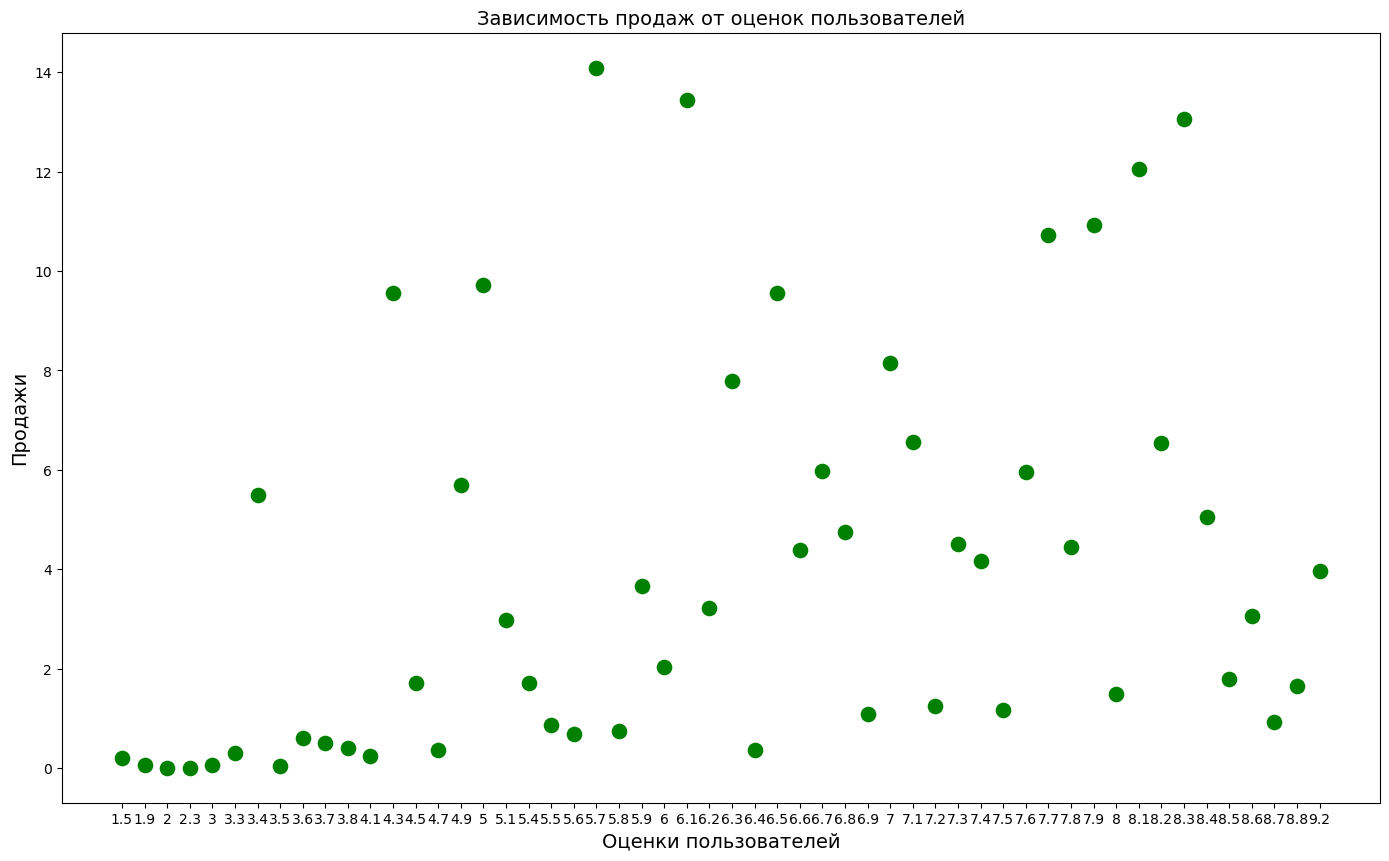

In [57]:
score_sales_platforms_dep(['PS4'])

Как видим на графике значения очень сильно разбросаны по всей площади не зависимо от оценок пользователей. На низких значениях оценки есть большое количество продах, в то же время на высоках оценках есть низкие продажи. Оценка пользователей не влияет на количество проданных экземпляров игр.


Платформа PS4 
     Оценка критиков  Количество продаж
0                19               0.12
1                25               0.06
2                31               0.02
3                32               0.20
4                42               0.07
5                43               0.05
6                44               0.09
7                45               0.14
8                47               0.19
9                48               0.36
10               49               0.01
11               51               0.01
12               52               0.07
13               53               0.33
14               55               0.02


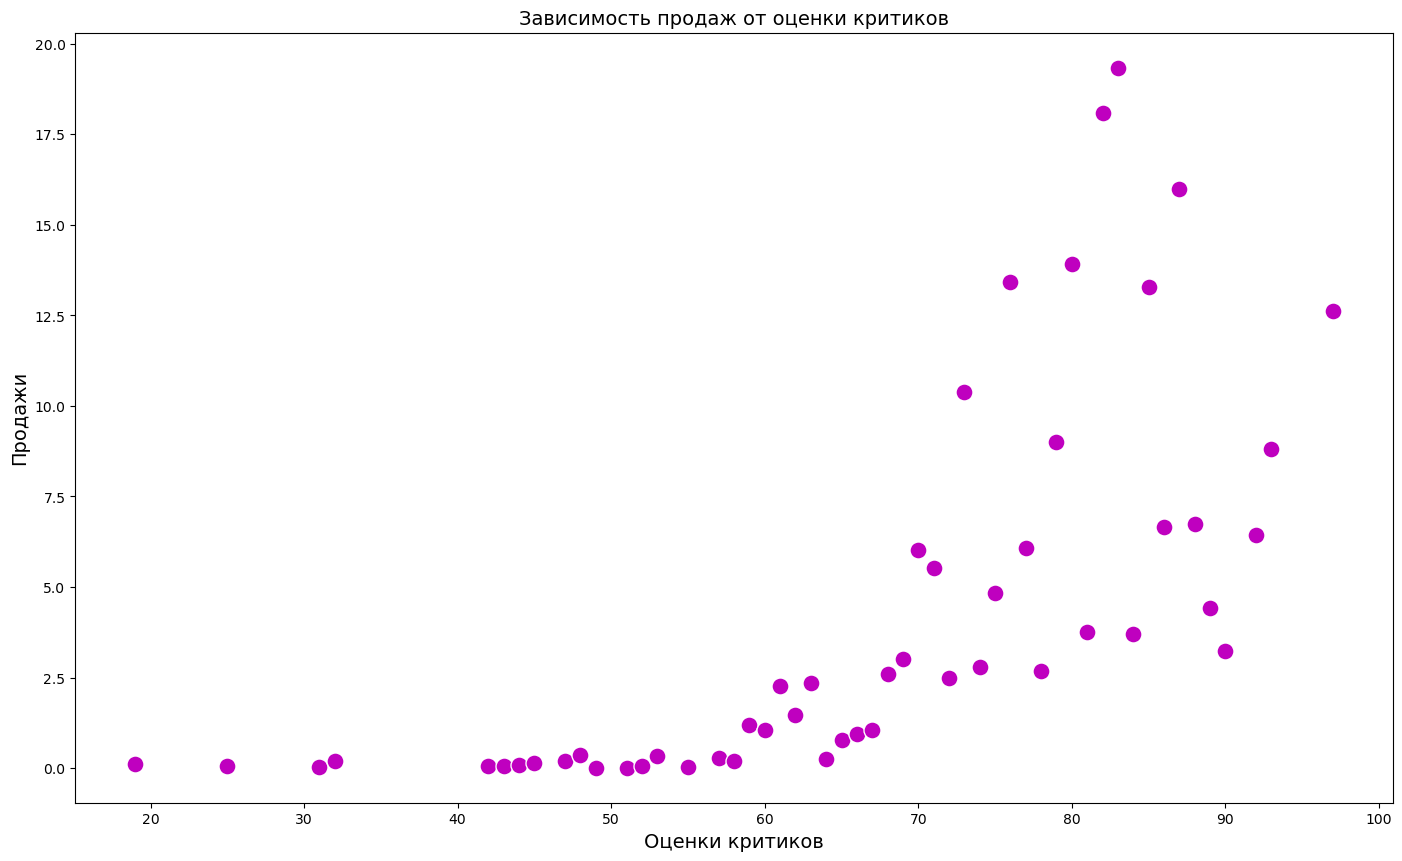

In [58]:
critic_sales_platforms_dep(['PS4'])

In [59]:
pirson_cof(['PS4'])

Коэффициент пирсона: 0.40757992311744384


Как видим на графике, в отличие от графика с оценками пользователей, здесь присутствует зависимость, чем выше оценка критиков, тем выше количество проданных экземпляров игр.

Ниже построим графики для оставшихся платформ и посмотрим есть ли в них зависимости.


Платформа XOne 
    Оценка пользователей  Количество продаж
0                   1.6               0.03
1                   2.1               0.12
2                   3.1               2.52
3                   3.2               0.41
4                     4               0.24
5                   4.1               3.64
6                   4.2               0.02
7                   4.3               0.32
8                   4.4               3.41
9                   4.6               0.62
10                  4.9               0.05
11                  5.1               3.33
12                  5.2               1.25
13                  5.3               0.35
14                  5.4               7.75


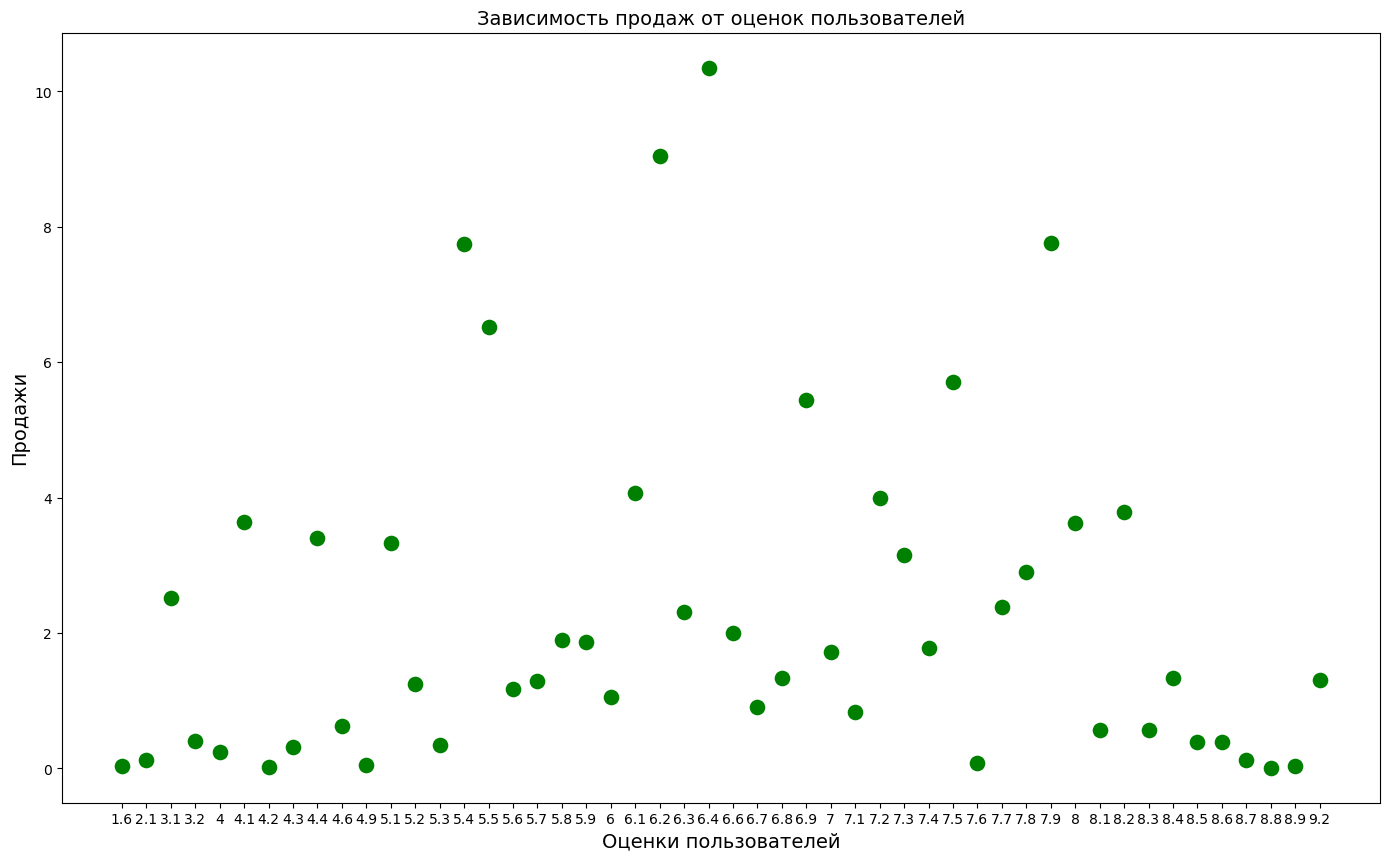

In [60]:
score_sales_platforms_dep(['XOne'])

Аналогичная ситуация, что и на графике платформы 'PS4', значения слишком разбросаны. Оценка пользователей не влияет на количество продаж.

Платформа XOne 
     Оценка критиков  Количество продаж
0                20               0.09
1                35               0.05
2                39               0.12
3                45               0.02
4                48               0.05
5                49               0.14
6                51               0.16
7                52               0.02
8                53               0.22
9                54               0.10
10               55               0.06
11               56               0.58
12               58               0.25
13               59               0.41
14               60               1.10


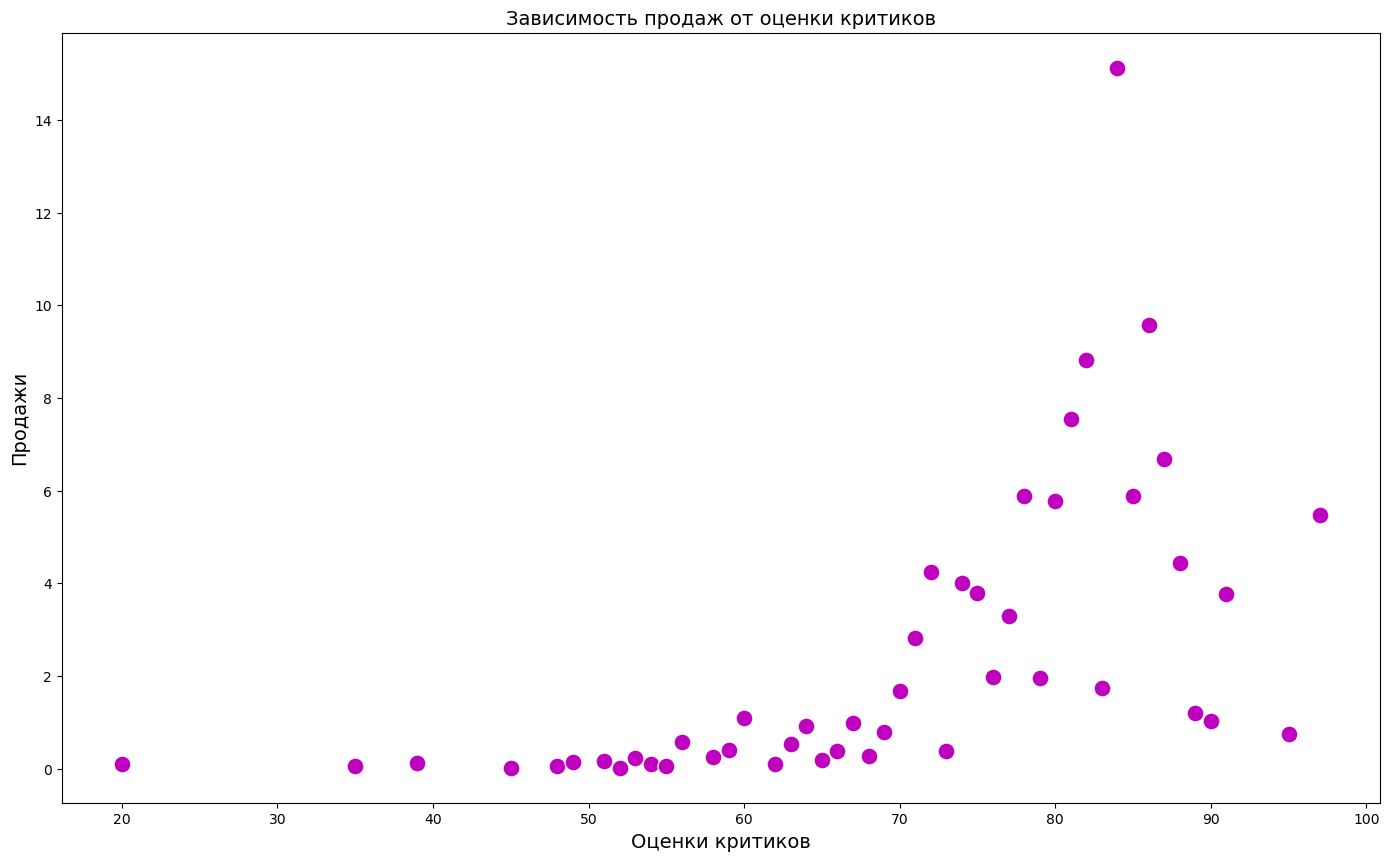

In [61]:
critic_sales_platforms_dep(['XOne'])

In [62]:
pirson_cof(['XOne'])

Коэффициент пирсона: 0.14928258617391887


Здесь опять как и на графике с платформой 'PS4' видим, что чем выше оценка критиков, тем выше количество продаж. Значит, оценка критиков влияет на продажи.


Платформа 3DS 
    Оценка пользователей  Количество продаж
0                   2.4               0.48
1                   3.4               0.28
2                   4.8               0.36
3                   5.1               0.04
4                   5.4               0.69
5                   5.6               0.10
6                   5.8               0.03
7                   6.1               1.46
8                   6.3               0.29
9                   6.4               0.54
10                  6.6               0.33
11                  6.8               0.79
12                  6.9               3.05
13                    7               0.53
14                  7.1               0.73


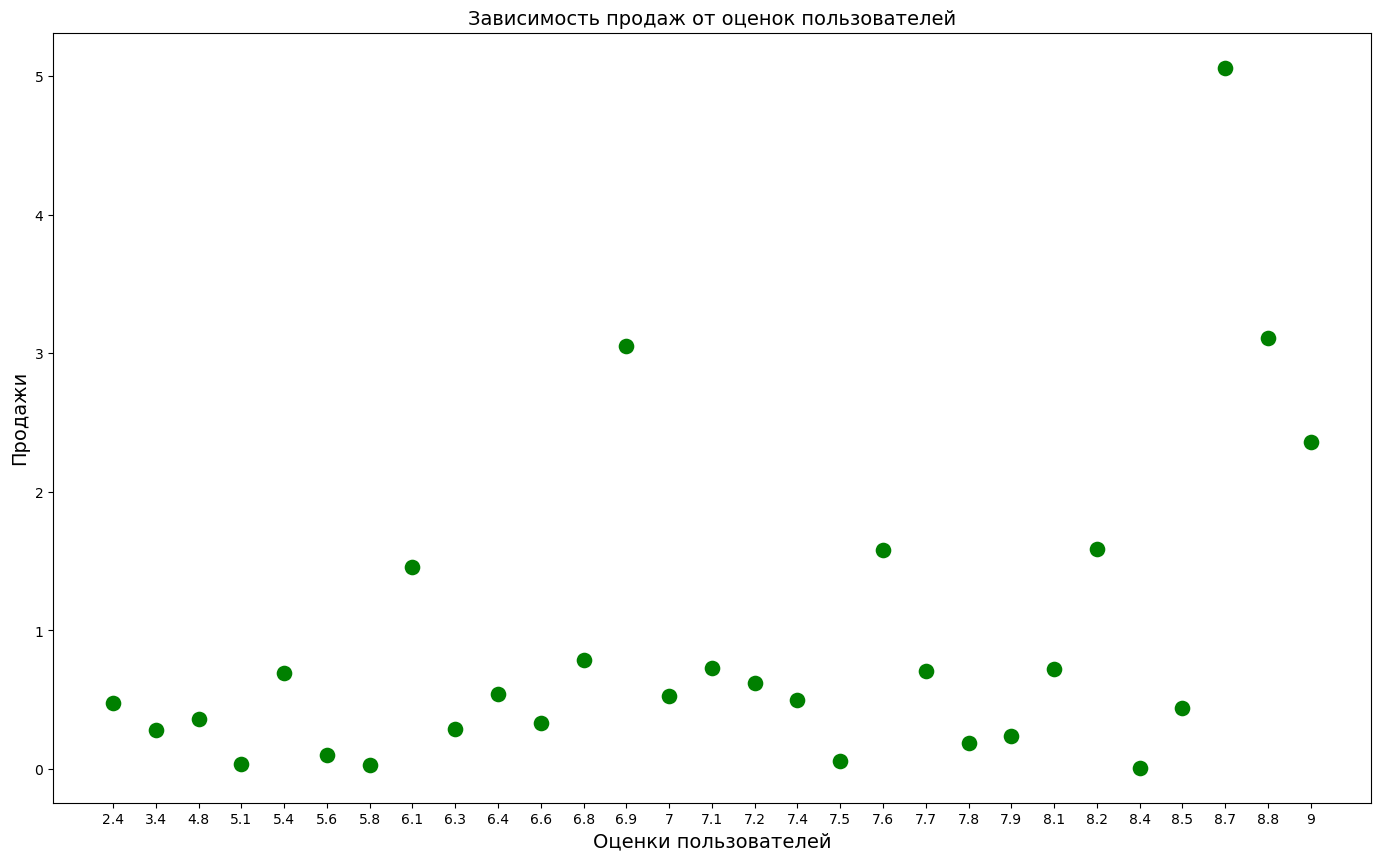

In [63]:
score_sales_platforms_dep(['3DS'])

Платформа 3DS 
     Оценка критиков  Количество продаж
0                26               0.02
1                43               0.02
2                45               0.03
3                46               0.03
4                47               0.29
5                51               0.06
6                57               0.36
7                58               0.30
8                60               0.26
9                61               0.33
10               63               0.08
11               64               1.42
12               65               0.13
13               66               3.05
14               67               0.25


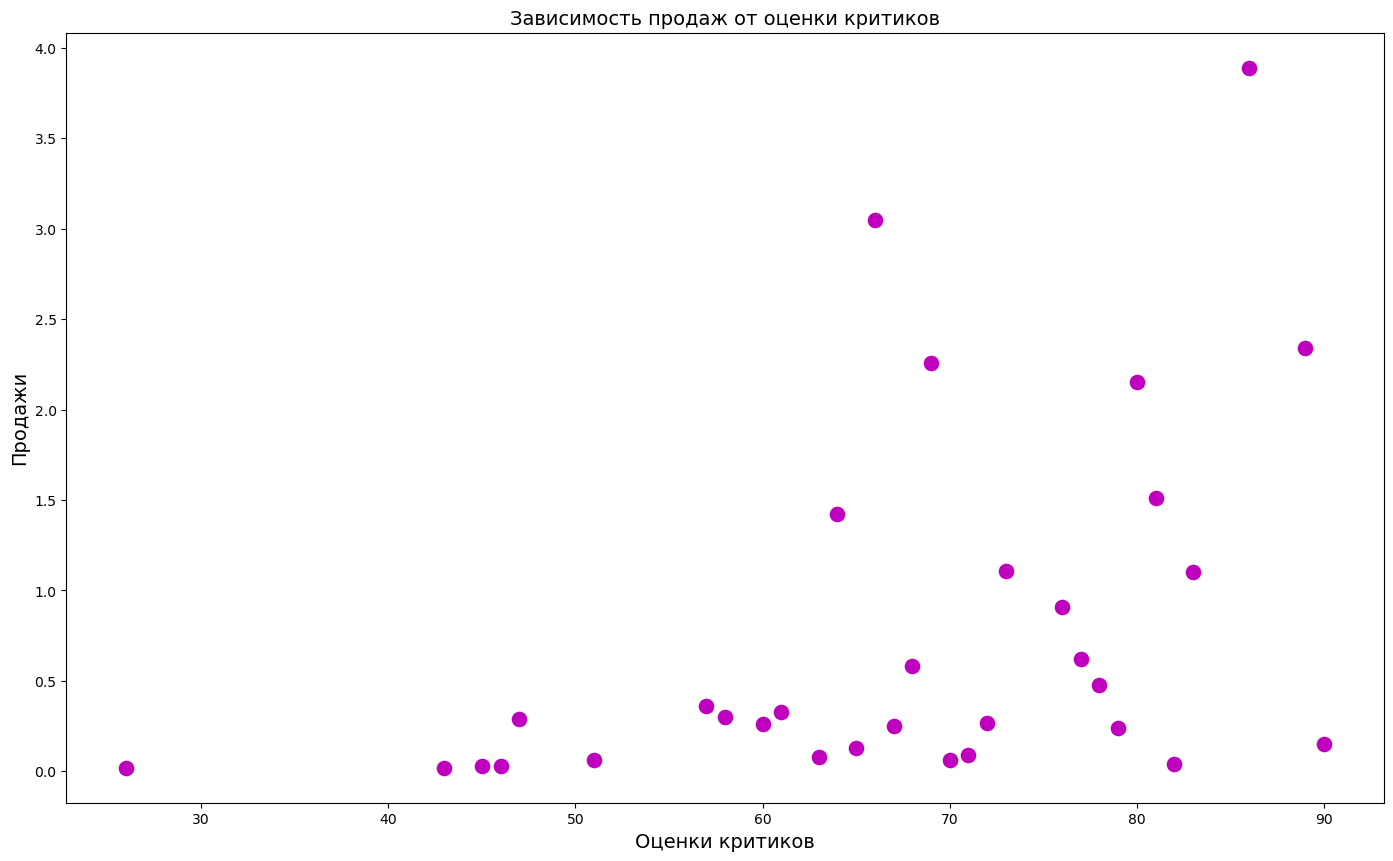

In [64]:
critic_sales_platforms_dep(['3DS'])

In [65]:
pirson_cof(['3DS'])

Коэффициент пирсона: 0.09213308705133212


Платформа PS3 
    Оценка пользователей  Количество продаж
0                   0.2               0.11
1                   1.6               0.36
2                     2               0.12
3                   2.7               1.46
4                   3.1               1.61
5                   3.2               2.70
6                   3.3               0.73
7                   3.4               0.72
8                   3.5               1.45
9                   3.7               0.34
10                  4.1               0.55
11                  4.2               0.56
12                  4.3               0.61
13                  4.5               5.99
14                  4.6               0.84


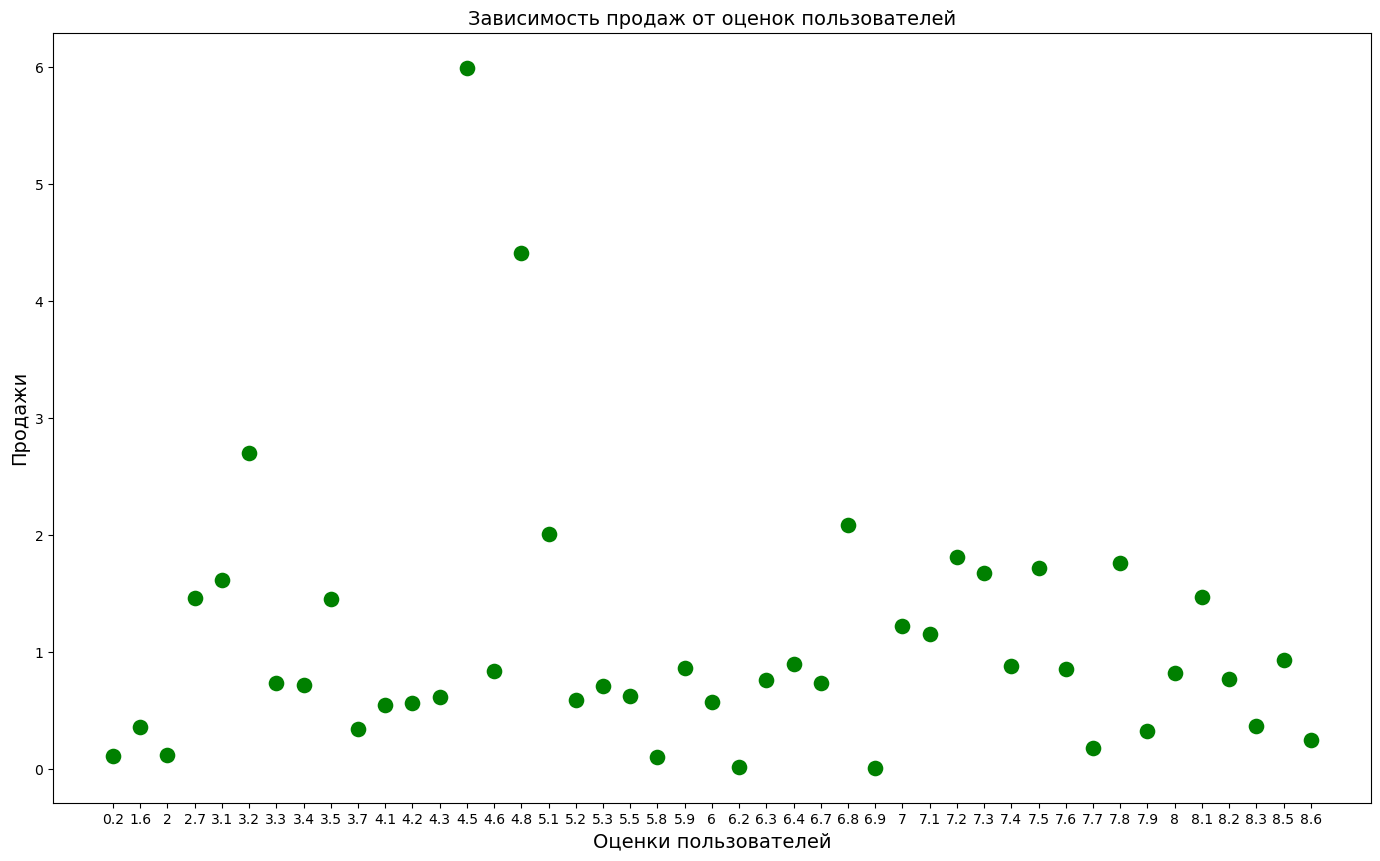

In [66]:
score_sales_platforms_dep(['PS3'])

Платформа PS3 
     Оценка критиков  Количество продаж
0                36               0.08
1                40               0.08
2                43               0.16
3                49               0.10
4                54               0.30
5                55               0.78
6                56               0.11
7                58               0.03
8                59               0.10
9                62               0.41
10               63               0.22
11               64               0.06
12               65               0.02
13               66               0.73
14               67               0.27


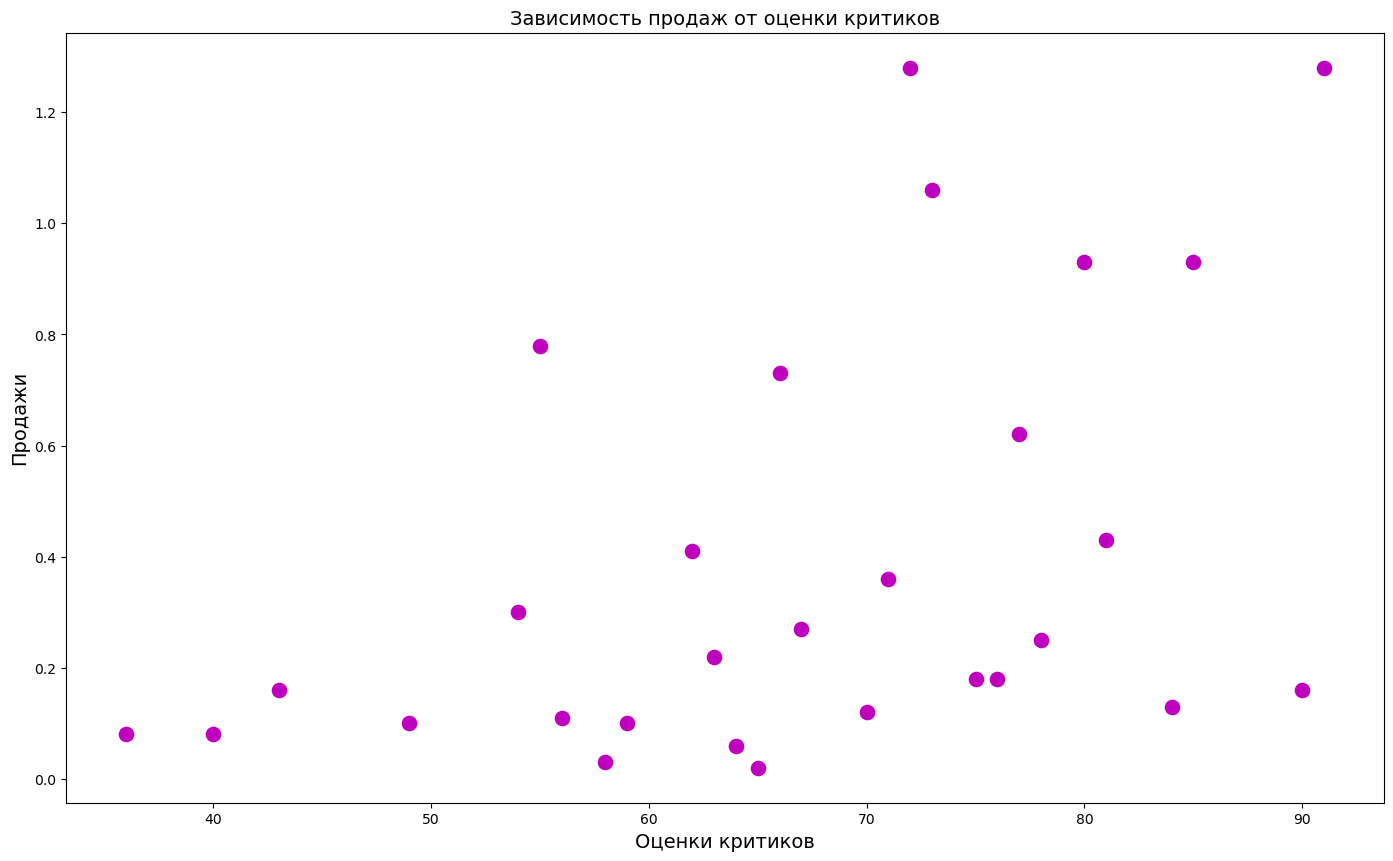

In [67]:
critic_sales_platforms_dep(['PS3'])

In [68]:
pirson_cof(['PS3'])

Коэффициент пирсона: 0.018170868993467208


Платформа X360 
    Оценка пользователей  Количество продаж
0                   0.7               0.18
1                   1.7               0.38
2                   2.8               0.52
3                   2.9               1.73
4                     3               1.63
5                   3.2               0.94
6                   3.4               0.21
7                   3.8               0.25
8                     4               0.64
9                   4.1               0.57
10                  4.2               2.92
11                  4.3               0.04
12                  4.4               0.84
13                  4.6               0.48
14                  4.7               1.92


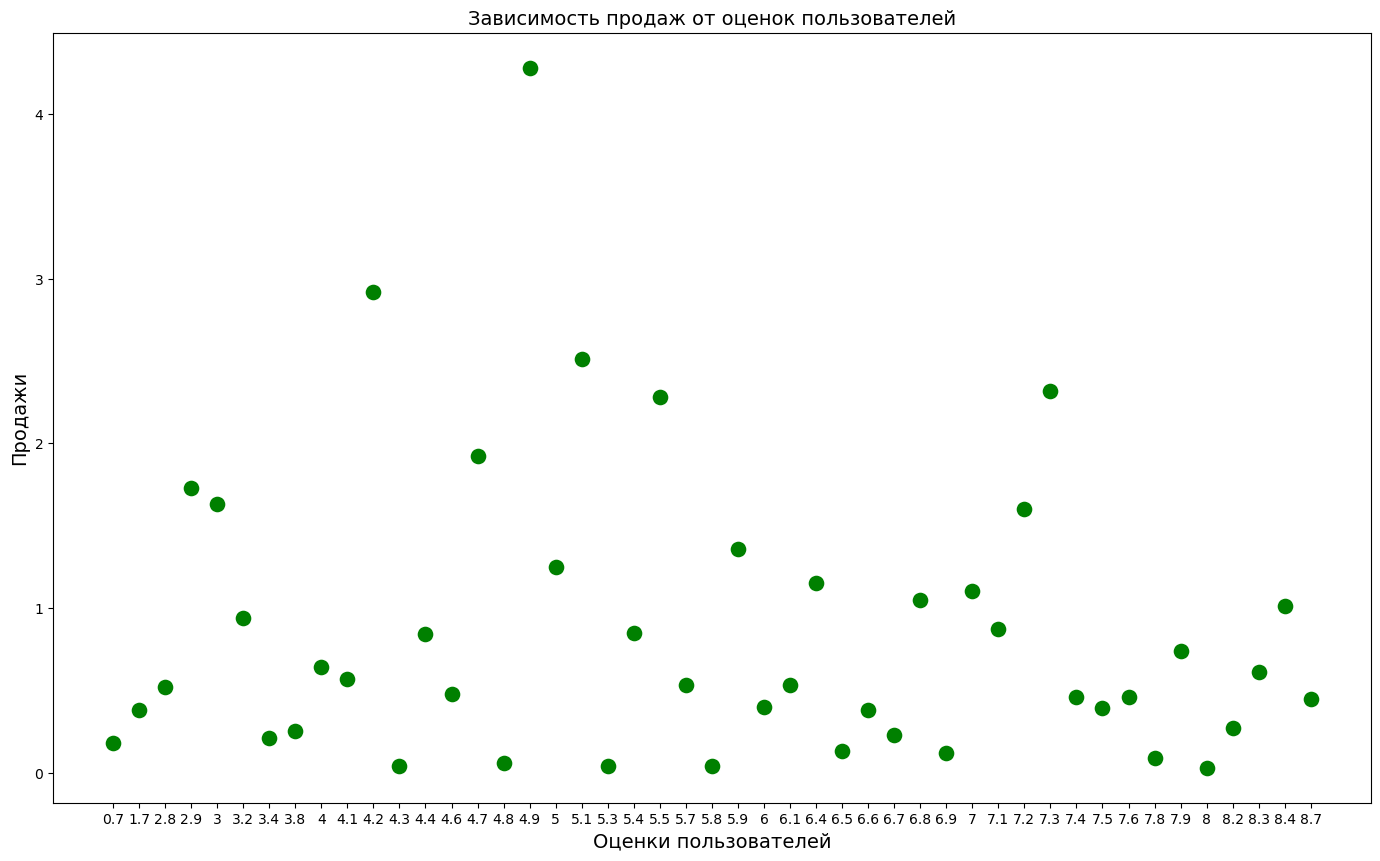

In [69]:
score_sales_platforms_dep(['X360'])

Платформа X360 
     Оценка критиков  Количество продаж
0                32               0.08
1                35               0.04
2                44               0.06
3                48               0.06
4                50               0.68
5                51               0.05
6                53               0.06
7                58               0.05
8                60               0.10
9                62               0.22
10               64               0.23
11               65               0.17
12               69               2.34
13               70               0.54
14               71               0.05


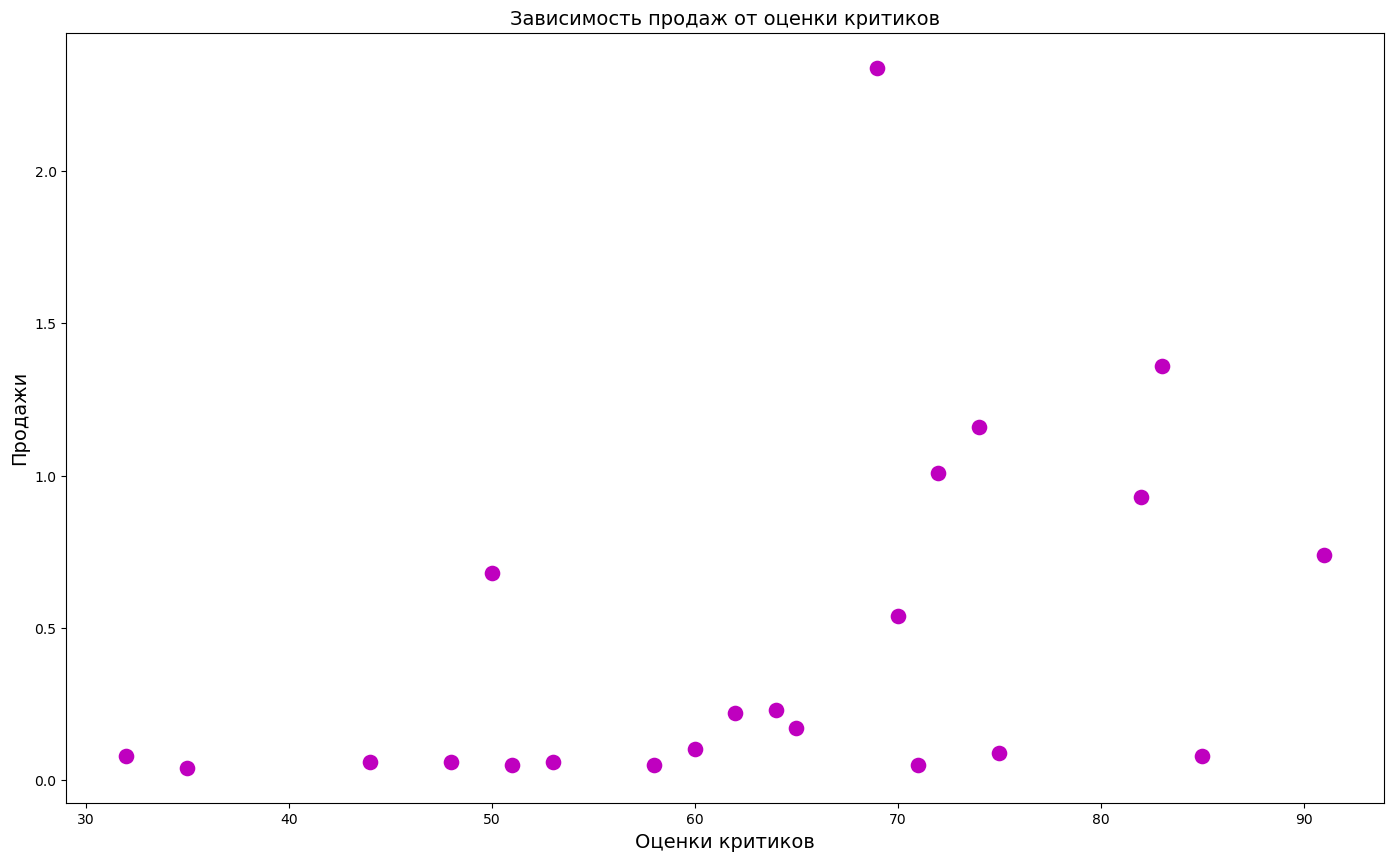

In [70]:
critic_sales_platforms_dep(['X360'])

In [71]:
pirson_cof(['X360'])

Коэффициент пирсона: 0.18532984560248203


Платформа WiiU 
    Оценка пользователей  Количество продаж
0                   2.8               0.01
1                   3.6               0.31
2                   4.4               0.42
3                   4.6               0.03
4                   4.9               0.09
5                   5.2               0.03
6                   5.3               0.44
7                   5.6               0.48
8                   6.1               0.19
9                   6.4               0.13
10                  6.5               2.30
11                  6.6               0.73
12                  6.8               0.66
13                  6.9               0.60
14                    7               0.91


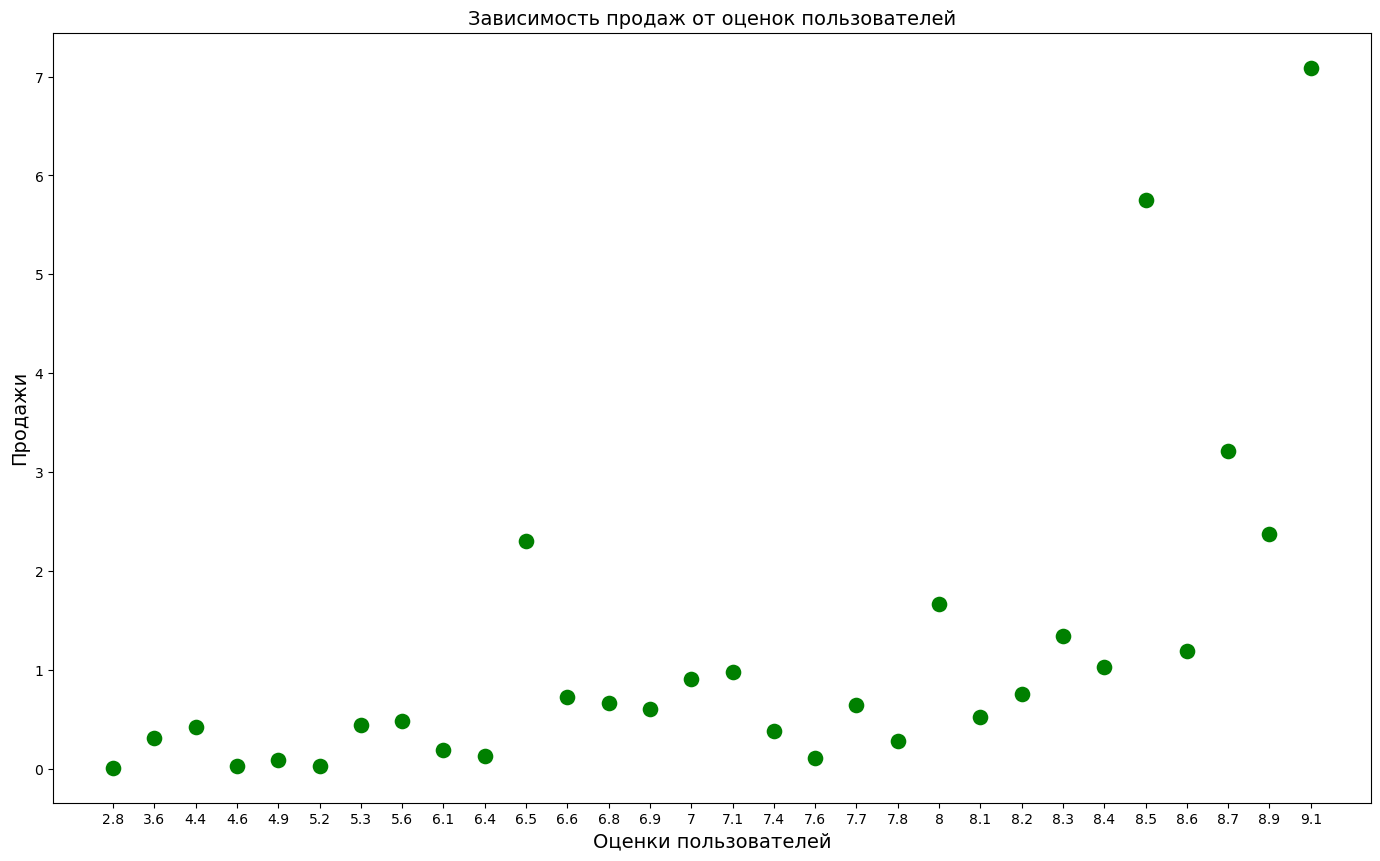

In [72]:
score_sales_platforms_dep(['WiiU'])

Платформа WiiU 
     Оценка критиков  Количество продаж
0                32               0.31
1                43               0.07
2                45               0.12
3                46               0.42
4                47               0.09
5                48               0.03
6                58               0.44
7                62               0.66
8                66               1.64
9                67               0.12
10               68               1.02
11               69               0.61
12               70               0.01
13               71               0.79
14               73               1.08


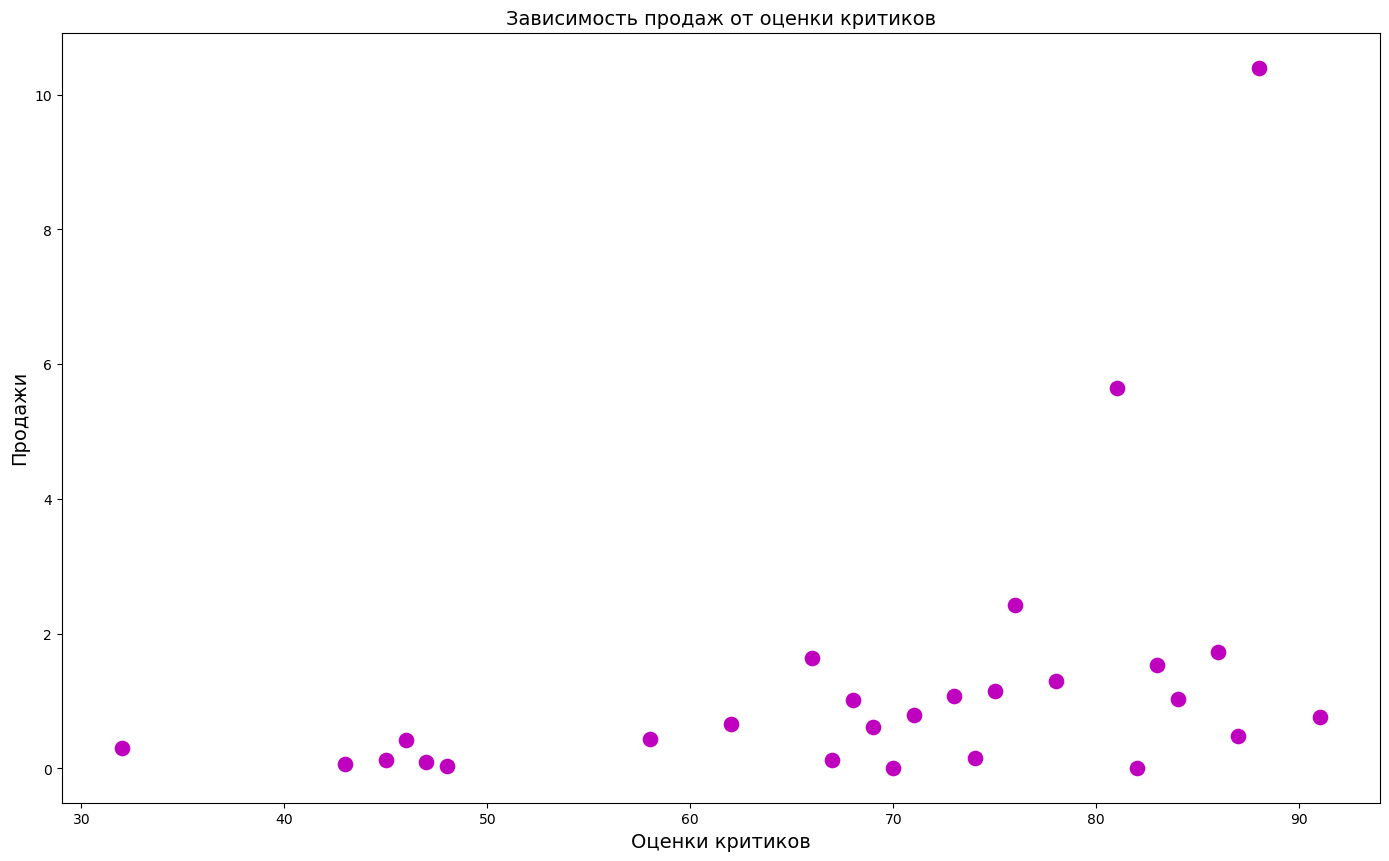

In [73]:
critic_sales_platforms_dep(['WiiU'])

In [74]:
pirson_cof(['WiiU'])

Коэффициент пирсона: 0.7298704023335248


**Вывод:**

Можно сделать вывод, что оценка критиков влияет на количество продаж экземпляров игр, а оценка пользователей не влияет на количество проданных экземпляров игр.

#### Прибыльные жанры

Посмотрим на общее распределение по жанрам. Определим самые прибыльные жанры и выясним выделяются ли жанры с высокими и низкими продажами.

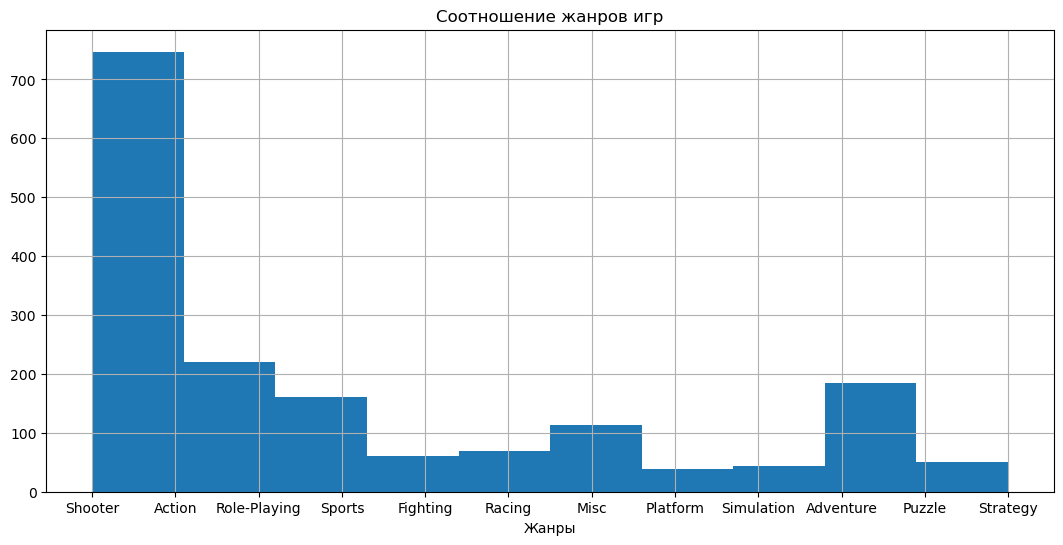

In [75]:
current_period['genre'].hist(figsize=(13, 6))
plt.title('Соотношение жанров игр')
plt.xlabel('Жанры')
plt.show()

Самыми популярными жанрами оказались 'Shooter' и 'Action'. Теперь проверим какие жанры являются наиболее и наименее прибыльными.

Самые не популярные жанры: 'Platforms', 'Simulation', 'Puzzle','Strategy'.


In [76]:
genre_sales_pivot = current_period.pivot_table(index='genre', values='sales_total', aggfunc='sum')
genre_sales_pivot = genre_sales_pivot.reset_index()
genre_sales_pivot.head(10)

,genre,sales_total
0,Action,199.36
1,Adventure,17.55
2,Fighting,28.22
3,Misc,37.55
4,Platform,18.09
5,Puzzle,2.21
6,Racing,27.52
7,Role-Playing,101.44
8,Shooter,170.94
9,Simulation,13.13


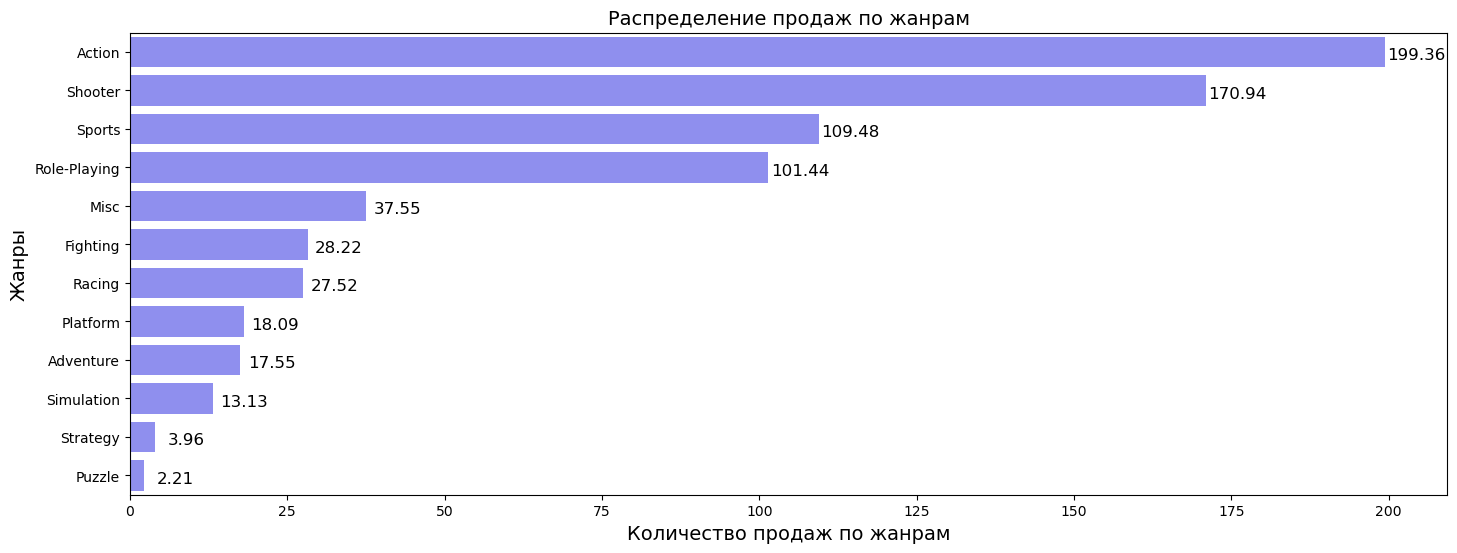

In [77]:
genre_sales_pivot_sort = genre_sales_pivot.copy().sort_values(by='sales_total', ascending=False)
plt.figure(figsize=(17, 6))
sns.barplot(data=genre_sales_pivot_sort, x='sales_total', y='genre', color='blue', alpha=0.5)
for i, v in enumerate(genre_sales_pivot_sort['sales_total']):
    plt.text(v+5, i+0.2, str(round(v, 2)), ha = 'center', size = 12)
plt.title('Распределение продаж по жанрам', fontsize=14)
plt.ylabel('Жанры', fontsize=14)
plt.xlabel('Количество продаж по жанрам', fontsize=14)
plt.show()

Как видно на графике, самыми прибыльными жанрами являются 'Action' и 'Shooter'. До этого на гистограмме было видно что именно эти жанры являются популярными в играх. Также достаточно высокие продажи игр по жанрам 'Role-playing' и 'Sports'.

Самое низкое количество продаж по жанрам 'Puzzle', 'Strategy', 'Simulation'. На гистограмме выше именно эти жанры являются не популярными в играх. То есть меньшее количество игр содержит эти жанры.

Посмотрим как распределены данные, какое количество игр находится в каждом жанре.


In [78]:
#Посчитаем количество игр по жанрам
genre_list = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter',\
             'Simulation', 'Sports', 'Strategy']
for genre in genre_list:
    print(genre, (current_period['genre'] == genre).sum())

Action 619
Adventure 185
Fighting 60
Misc 113
Platform 38
Puzzle 14
Racing 69
Role-Playing 221
Shooter 128
Simulation 44
Sports 161
Strategy 37


Проверим среднее и медианное значения.


In [79]:
genre_list = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter',\
             'Simulation', 'Sports', 'Strategy']
for genre in genre_list:
    print(genre, round(current_period.loc[(current_period['genre'] == genre),  'sales_total'].median(), 2))

Action 0.09
Adventure 0.03
Fighting 0.12
Misc 0.09
Platform 0.14
Puzzle 0.04
Racing 0.09
Role-Playing 0.11
Shooter 0.52
Simulation 0.1
Sports 0.18
Strategy 0.06


In [80]:
genre_list = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter',\
             'Simulation', 'Sports', 'Strategy']
for genre in genre_list:
    print(genre, round(current_period.loc[(current_period['genre'] == genre),  'sales_total'].mean(), 2))

Action 0.32
Adventure 0.09
Fighting 0.47
Misc 0.33
Platform 0.48
Puzzle 0.16
Racing 0.4
Role-Playing 0.46
Shooter 1.34
Simulation 0.3
Sports 0.68
Strategy 0.11


Как видим из данных самым популярным получился жанр 'Shooter'. После него популярен жанр 'Sports'. При этом несмотря на то, что в жанре 'Action' высокие продажи, там находится самое большое количество игр. В это же время, в жанре 'Misc' игр почти в 5 раз меньше, чем в жанре 'Action', но их продажи могут быть сопоставимы.

А самым не популярным жанром оказался 'Adventure'.


**Вывод:**

Самые прибыльные жанры 'Shooter' и 'Sports'. Жанр 'Shooter' они очень сильно выделяется по прибыльности среди других жанров. Из всех выпущенных игр на платформах именно этот жанр также является самым популярным. 

Самые не прибыльные жанры 'Adventure', 'Puzzle', 'Strategy'. Именно эти жанры также являются в играх не популярными. Игр с этими жанрами меньше всего в таблице.

#### Вывод

- Была выяснена тенденция производства игр по годам, в каких годах был рост производства игр, а в каких годах спад. Рост производства игр начался в 2001 году и пик производств достиг в 2008-2009 годах, после чего начался спад производства игр. Так как такой длинный период имел огромные перепады, он не давал бы нам корректно сделать прогнозы, поэтому было принято решение выявить актуальный период; 
- Был определен актуальный период для исследования: с 2014 по 2016 год, есть исследование проводилось по данным за последние 3 года;
- Были определены сроки появления и исчезания платформ. Некоторые платформы жили в районе 5-6 лет, а некоторые 12 лет, после чего игры практически не продавались на них;
- Было выяснено что пик продаж приходился примерно на середину жизни платформы, этот результат помогает сделать прогноз на то, сколько платформа может еще продолжать жить и можно ли на ней продавать игры;
- Было выяснено, что новые версии платформ появляются спустя 7-8 лет после выхода предыдущей версии;
- Было выяснено, что актуальными платформами, на которых еще есть потенциал продавать игры, являются 'PS4', 'XOne' и '3DS'; 
- Было выяснено, что самыми лидирующими по продажам платформами на за актуальный период являются 'PS4', 'XOne' и 'WiiU';
- Было выяснено, что оценка критиков влияет на количество проданных игр на платформах, а оценка пользователей не влияет;
- Было выяснено, что самыми прибыльными являются жанры 'Shooter' и 'Sports', и что именно эти жанры являются популярными в играх;
- Было выяснено, что не прибыльными жанрами являются 'Adventure', 'Puzzle', 'Strategy', эти жанры также являются не популярными и редко встречаются в играх.

### Исследование портретов пользователей в регионах

#### Топ-5 платформ по регионам

Определим для каждого региона самые популярные топ-5 плытформ. Опишем различия в долях продаж.

In [81]:
def labels_for_pie(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct: 1.1f}%\n({absolute:d} продаж)"

#Напишем функцию, которая выводит сводную таблицу и строит диаграмму топ-5 популярных вещей по разным метрикам
def popular_metric_by_region(metric_data):
    region_popular = current_period.pivot_table(index=metric_data.get('metric_column'), \
                                                             values=metric_data.get('region_column'), \
                                                             aggfunc='sum')
    region_popular = region_popular.reset_index()
    top_five = region_popular[metric_data.get('region_column')].nlargest(5)
    region_popular = region_popular.query('{0} in @top_five'.format(metric_data.get('region_column')))
    print(color.bold + color.red + 'Регион', metric_data.get('region_display_name') + color.end,'\n', \
                                             region_popular.head(5))
    region_popular[metric_data.get('region_column')].plot(kind='pie',
                                                          labels=region_popular[metric_data.get('metric_column')],
                                                          figsize=(8, 8),
                                                          colors=sns.color_palette('Set2'),
                                                          explode=[0.02, 0.02, 0.02, 0.02, 0.02],
                                                          fontsize=10,
                                                          autopct=lambda pct: labels_for_pie(pct,
                                                          region_popular[metric_data.get('region_column')]))
    plt.title(metric_data.get('plot_title').format(metric_data.get('region_display_name'), fontsize=14))
    plt.legend(title=metric_data.get('plot_legend_title') + ':',
               fontsize=14,
               bbox_to_anchor=(1, 0, 0, 1))
    plt.axis('off')
    plt.show()

#Напишем функцию, которая будет возвращать название региона
def get_region_display_name(region_column):
    if region_column == 'eu_sales':
        return 'EU'
    elif region_column == 'jp_sales':
        return 'JP'
    else:
        return 'NA'

#Напишем функцию, которая хранит в себе метрики платформ по регионам
def popular_platform_by_region(region_column):
    popular_metric_by_region(
        {
            'region_column':region_column,
            'region_display_name':get_region_display_name(region_column),
            'metric_column':'platform',
            'plot_title':'Популярные платформы в {0} регионе',
            'plot_legend_title':'Платформы'
        }
    )

Регион EU 
   platform  eu_sales
0      3DS     16.12
1       PC     17.97
2      PS3     25.54
3      PS4    130.04
9     XOne     46.25


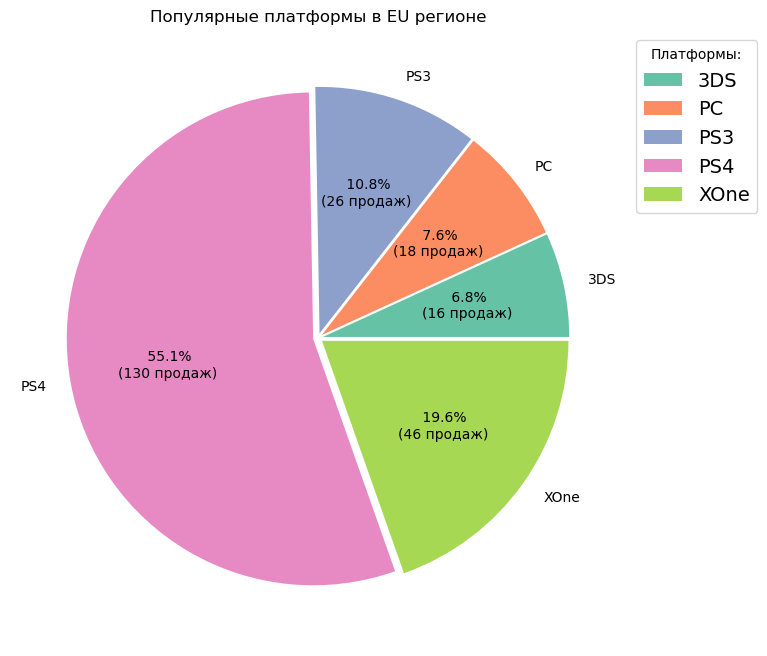

In [82]:
popular_platform_by_region('eu_sales')

По продажам игр в Европе топ-5 платформ: '3DS', 'PC', 'PS3', 'PS4', 'XOne'. Среди пяти платформ лидирует платформа 'PS4' она имеет долю продаж равную 55%.


Регион JP 
   platform  jp_sales
0      3DS     44.24
2      PS3     11.22
3      PS4     15.02
5      PSV     14.54
7     WiiU      7.31


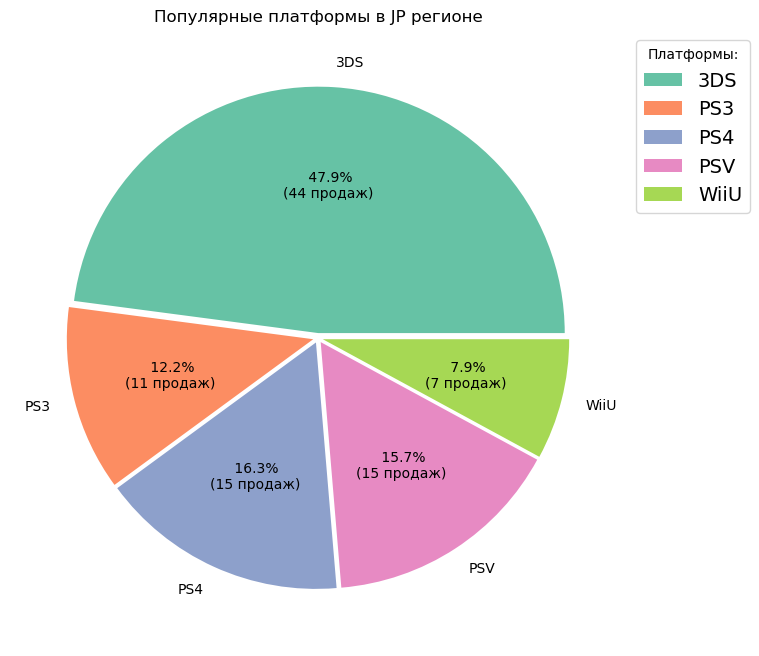

In [83]:
popular_platform_by_region('jp_sales')

По продажи игр в Японии топ-5 платформ: '3DS', 'PS3', 'PS4', 'PSV', 'WiiU'. Среди них лидирует по продажам '3DS', она имеет долю продаж равную 47.9%.


Регион NA 
   platform  na_sales
0      3DS     22.64
2      PS3     22.05
3      PS4     98.61
8     X360     28.30
9     XOne     81.27


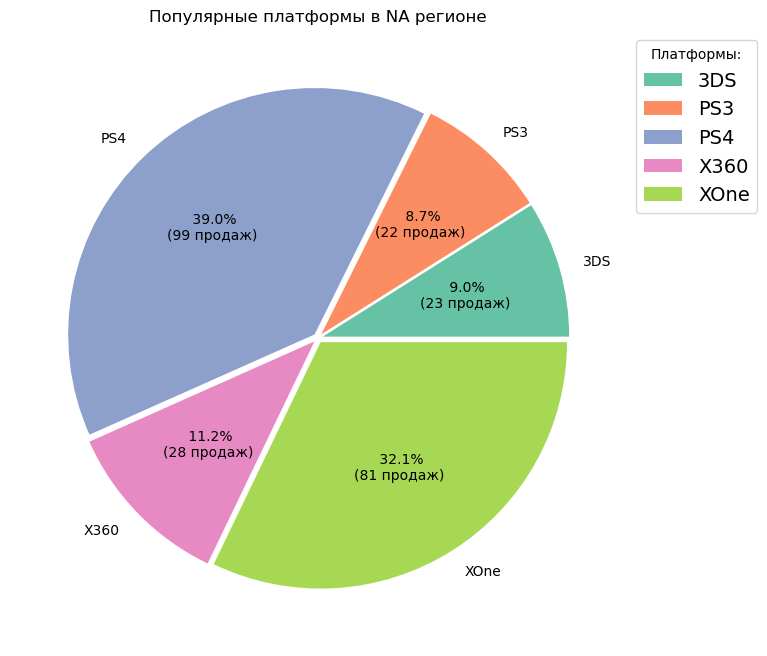

In [84]:
popular_platform_by_region('na_sales')

По продажам игр в Северной Америке топ-5 платформ: '3DS', 'PS3', 'PS4', 'X360', 'XOne'. Среди них по продажам лидируют две платформы: 'PS4', и 'XOne'. Доля продаж платформы 'PS4' равна 39%, а доля продаж платформы 'XOne' равна 32%. Совокупно эти две платформы имеют долю равную 71%.

**Вывод:**

На рынке Европы популярны платформы '3DS', 'PC', 'PS3', 'PS4', 'XOne'. Из них наибольшую долю продаж, составляюющую 55% имеет платформа 'PS4'.

На рынке Японии популярны платформы '3DS', 'PS3', 'PS4', 'PSV', 'WiiU'. Из них наибольшую долю продаж, составляюющую 47,9% имеет платформа '3DS'.

На рынке Северной Америки популярны платформы  '3DS', 'PS3', 'PS4', 'X360', 'XOne'. Из них наибольшую долю продаж занимают две платформы: 'PS4' и 'XOne'. Доля продаж платформы 'PS4' равна 39%, а доля продаж платформы 'XOne' равна 32%. Совокупно эти две платформы имеют долю равную 71%.

Также можно заметить, что в регионе Японии популярна '3DS' больше остальных, потому что это обусловлено их культурой использования портативных платформ, также сама платформа является Японской.

#### Топ-5 жанров

Определить для каждого региона топ-5 жанров игр. Сравниьт результаты.

In [85]:
#Напишем функцию, которая хранит метрики жанров по регионам
def popular_genre_by_region(region_column):
    popular_metric_by_region(
        {
            'region_column':region_column,
            'region_display_name':get_region_display_name(region_column),
            'metric_column':'genre',
            'plot_title':'Популярные жанры в {0} регионе',
            'plot_legend_title':'Жанры'
        }
    )

Регион EU 
            genre  eu_sales
0         Action     74.68
6         Racing     14.13
7   Role-Playing     28.17
8        Shooter     65.52
10        Sports     45.73


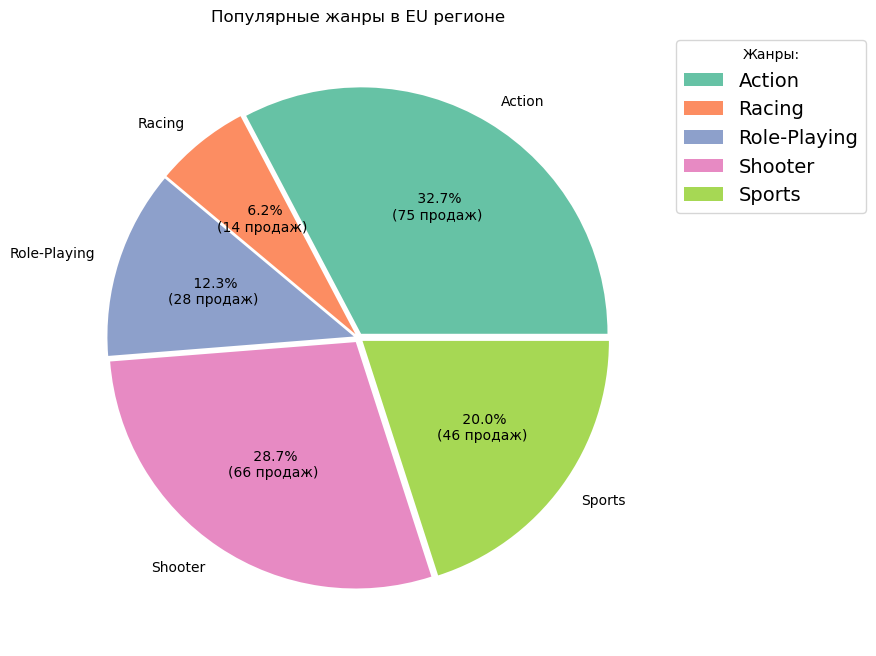

In [86]:
popular_genre_by_region('eu_sales')

В регионе Европы топ-5 популярных жанров игр: 'Action', 'Sports', 'Shooter', 'Role_Playing', 'Racing'. Среди них самые прибыльные 'Action', чья доля равна 32.7%, жанр 'Shooter' - 28.7% и жанр 'Sports' - 20%.


Регион JP 
           genre  jp_sales
0        Action     29.58
2      Fighting      6.37
3          Misc      5.61
7  Role-Playing     31.16
8       Shooter      4.87


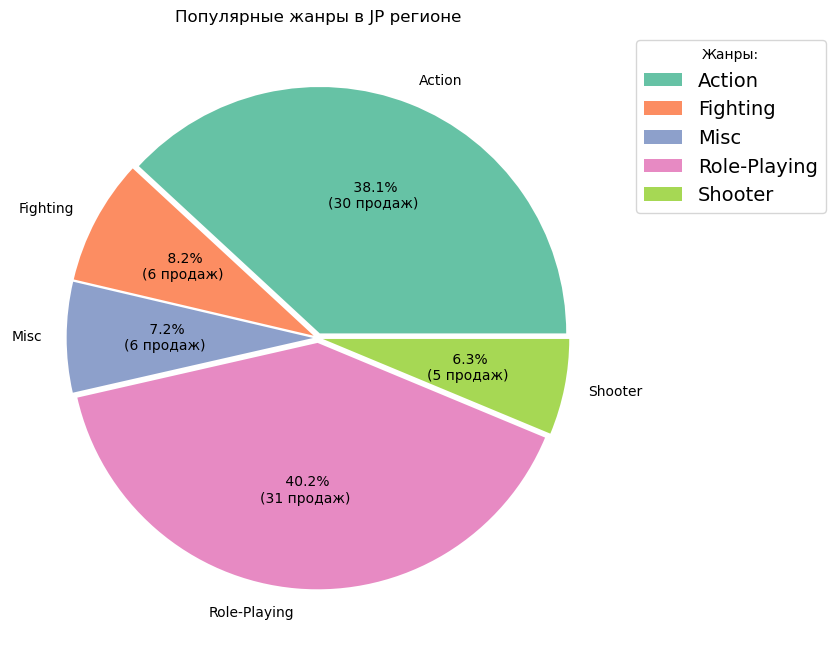

In [87]:
popular_genre_by_region('jp_sales')

В регионе Японии топ-5 популярных жанров игр: 'Action', 'Misc', 'Shooter', 'Role_Playing', 'Fighting'. Среди них самые прибыльные 'Role_Playing', чья доля равна 40.2% и 'Action' - его доля равна 38.1%.

Регион NA 
            genre  na_sales
0         Action     72.53
3           Misc     15.05
7   Role-Playing     33.47
8        Shooter     79.02
10        Sports     46.13


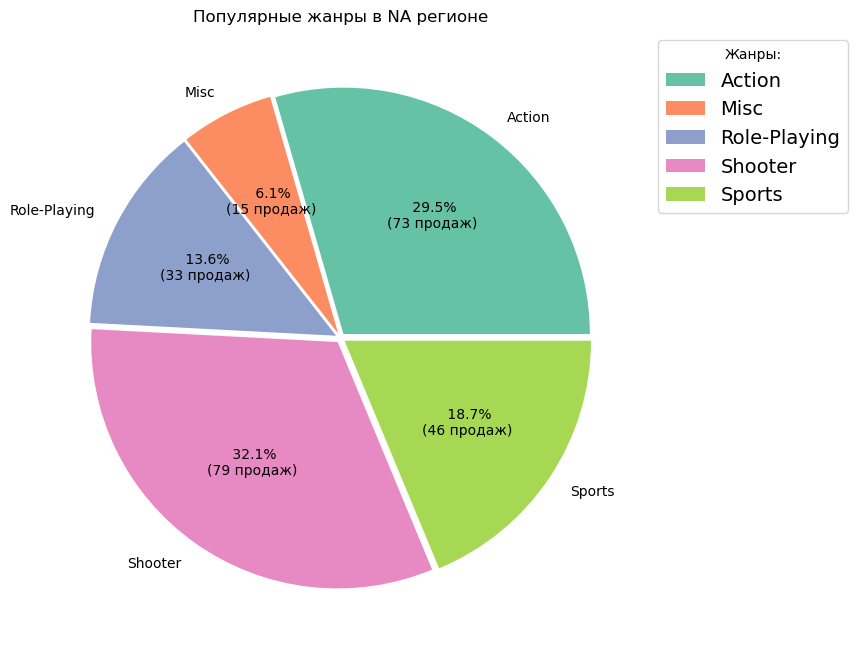

In [88]:
popular_genre_by_region('na_sales')

В регионе Северной Америки топ-5 популярных жанров игр: 'Action', 'Sports', 'Shooter', 'Role_Playing', 'Misc'. Среди них самые прибыльные 'Shooter', чья доля равна 32.1% и 'Action' - его доля равна 29.5%.

**Вывод:**

В регионе Европы среди топ-5 жанров игр самые прибыльные 'Action', чья доля равна 32.7%, жанр 'Shooter' - 28.7% и жанр 'Sports' - 20%.


В регионе Японии среди топ-5 жанров игр самые прибыльные 'Role_Playing', чья доля равна 40.2% и 'Action' - его доля равна 38.1%

В регионе Северной Америки среди топ-5 жанров игр самые прибыльные 'Shooter', чья доля равна 32.1% и 'Action' - его доля равна 29.5%.

Можно заметить, что во всех трех регионах популярен жанр 'Action' - его доля является одной из самых больших. В Японии в отличие от Европы и Северной Америки популярен жанр 'Role_Playing', скорее всего это обусловлено самой культурой в данном регионе.

В Северной Америке и Европе также популярен жанр 'Sports'. Жанр 'Sports' по популярности в этих регионах на 3 месте.

#### Влияние рейтинга ESRB

Определить для каждого региона влияет ли рейтинг ESrB на продажи в отдельном регионе.

In [89]:
#Напишем функцию, которая будет делать сводную таблицу по регионам и рисовать столбчатые диаграммы
def rating_esrb_sales_dep(region, region_display_name):
        table_pivot = current_period.pivot_table(index='rating', values=region, aggfunc='sum')
        table_pivot = table_pivot.reset_index()
        table_pivot.head()
        table_pivot.columns = ['Рейтинг ESRB', 'Количество продаж']
        table_pivot = table_pivot.sort_values(by='Количество продаж', ascending=False)
        print(color.bold + color.red + 'Регион', region_display_name + color.end,'\n', table_pivot.head(15))
        plt.figure(figsize=(17, 10))
        sns.barplot(data=table_pivot,
                    x='Рейтинг ESRB',
                    y='Количество продаж',
                    color='blue',
                    alpha=0.5)
        plt.title('Зависимость продаж от рейтинга ESRB', 
                  fontsize=14)
        plt.xlabel('Рейтинг ESRB', fontsize=14)
        plt.ylabel('Продажи', fontsize=14)
        plt.show()

Регион EU 
   Рейтинг ESRB  Количество продаж
2            M              93.44
4    undefined              58.95
0            E              58.06
3            T              34.07
1         E10+              26.16


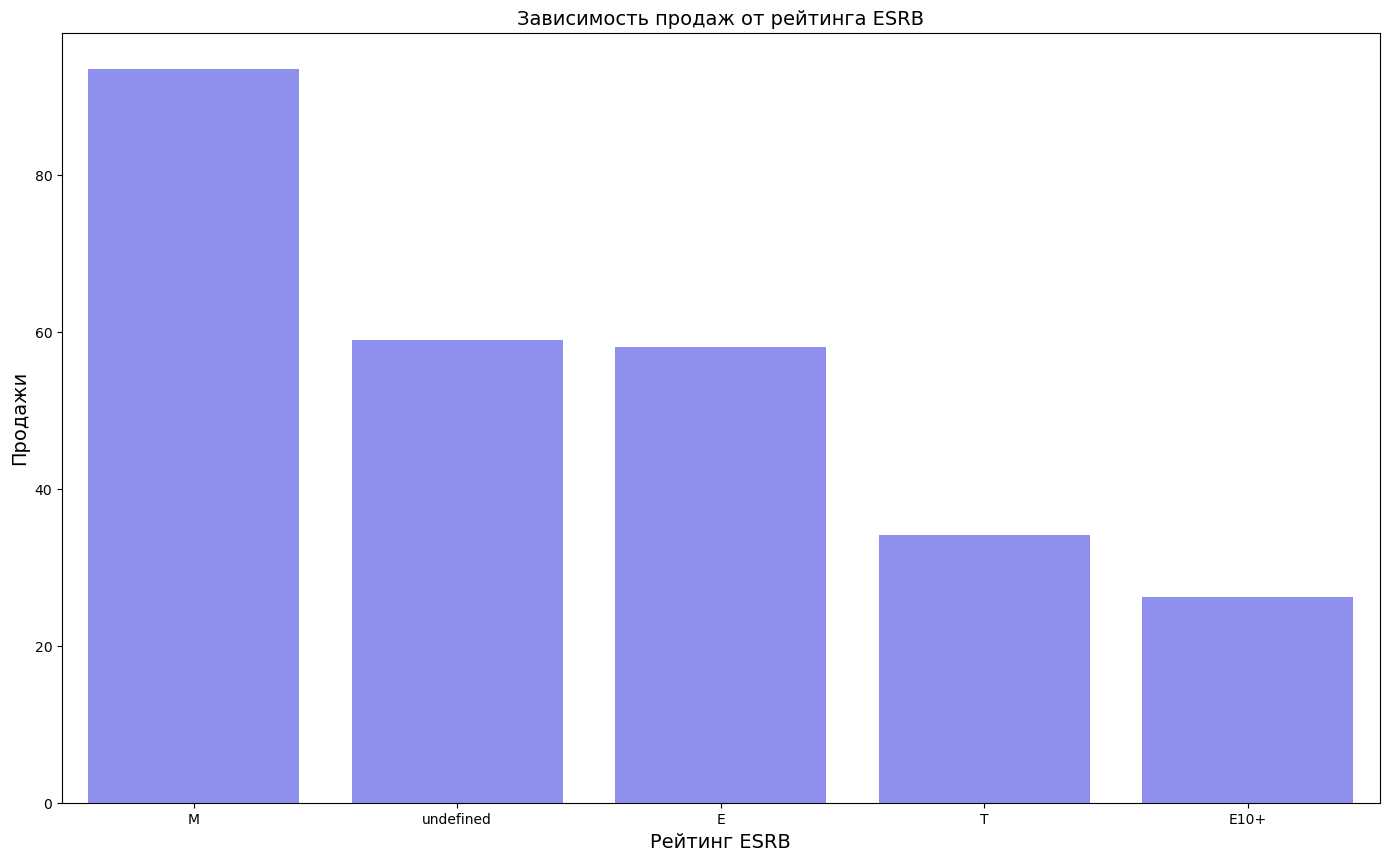

In [90]:
rating_esrb_sales_dep('eu_sales', 'EU')

В регионе Европы больше всего продаж игр с рейтингом ESRB - M (17+). Ранее мы находили, что в этом регионе преобладают жанры 'Action' и 'Shooter', скорее всего часть их и будет относиться к данной категории 'M'.


Регион JP 
   Рейтинг ESRB  Количество продаж
4    undefined              56.90
3            T              14.78
0            E               8.94
2            M               8.01
1         E10+               4.46


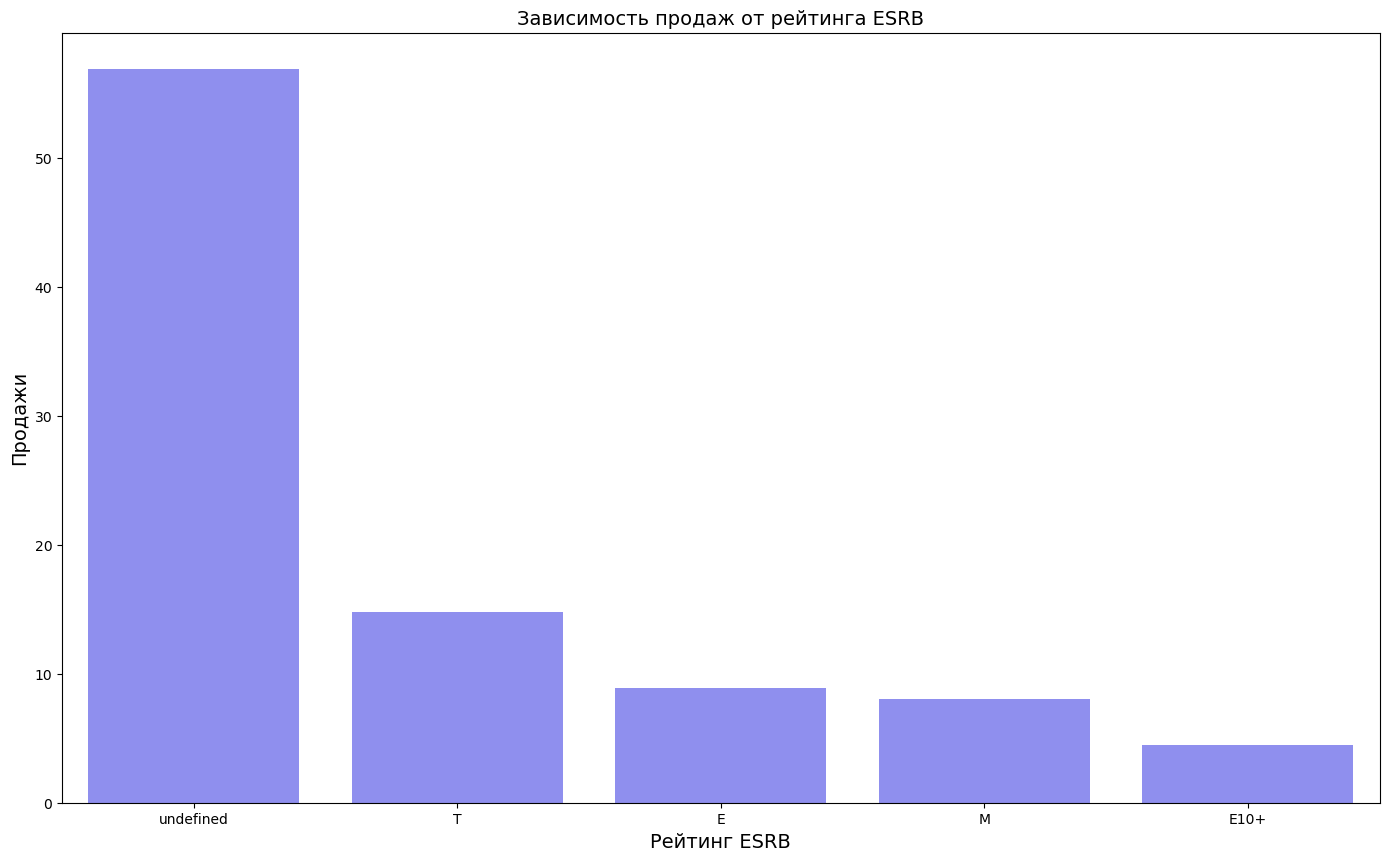

In [91]:
rating_esrb_sales_dep('jp_sales', 'JP')

В регионе Японии больше всего продаж игр с рейтингом ESRB - undefined. К сожалению, дать точную оценку сложно, потому что в этой категории могут находиться игры разных рейтингов. Ранее мы находили, что в этом регионе преобладают жанры 'Role-Playing' и 'Action', возможно игры из первого жанра имеют разную классификацию, но так как рейтинговая система Американская, а по предыдущим сделанным выше исследованиям мы выяснили, что в Японском регионе преобладают отечественные приставки ('3DS'), то скорее всего для своих игр японцы не делают рейтинговую оценку ESRB.

Регион NA 
   Рейтинг ESRB  Количество продаж
2            M              96.42
4    undefined              64.72
0            E              50.74
3            T              38.95
1         E10+              33.23


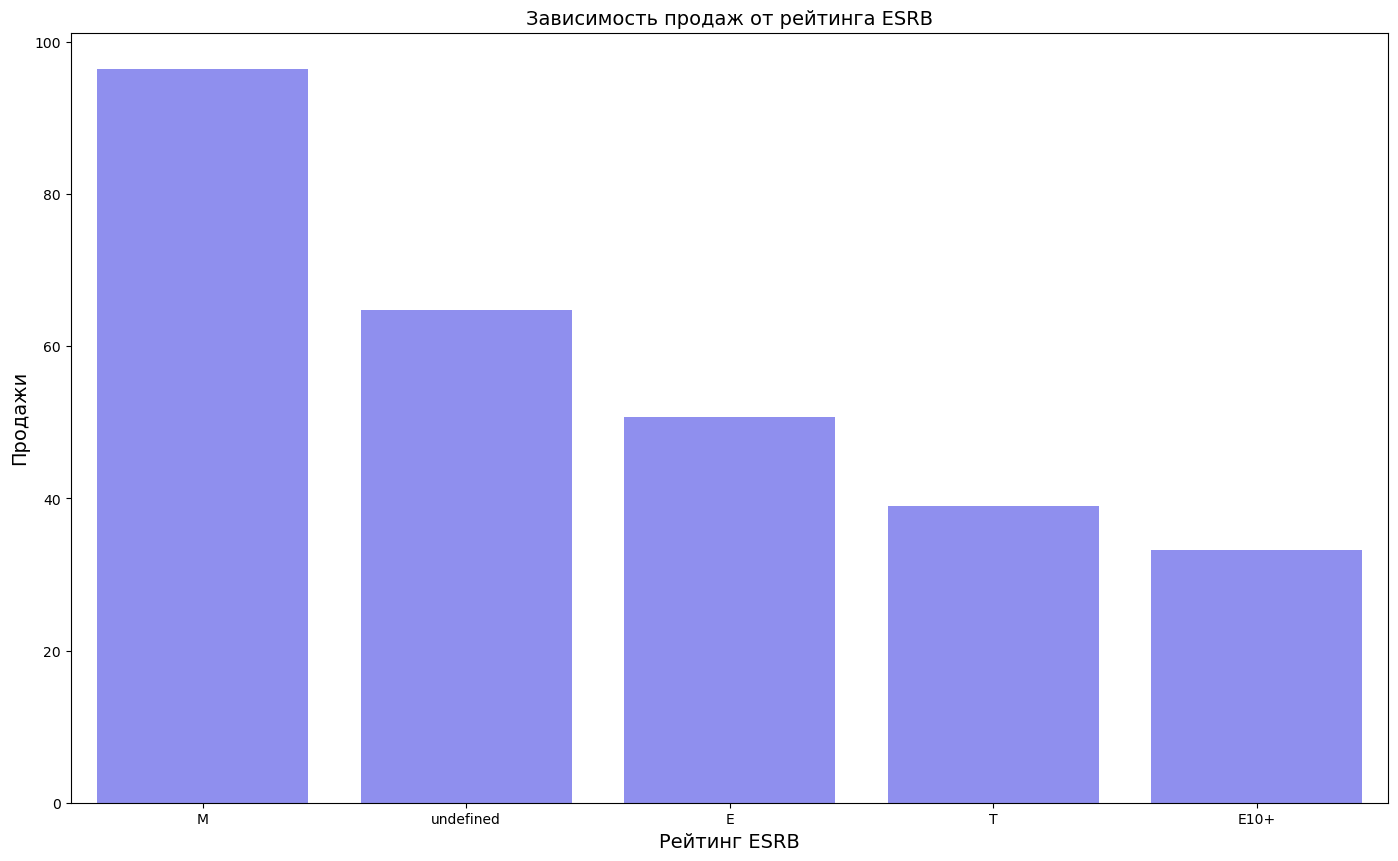

In [92]:
rating_esrb_sales_dep('na_sales', 'NA')

В регионе Северной Америки больше всего продаж игр с рейтингом ESRB - M (17+). Ранее мы находили, что в этом регионе преобладают жанры 'Action' и 'Shooter', скорее всего часть их и будет относиться к данной категории 'M'. 

**Вывод:**

Для регионов Северной Америки и Европы наиболее актуален рейтинг M(17+). Скорее всего к такому рейтингу относятся игры в жанрах 'Action' и 'Shooter' так как в этих регионах это наиболее популярные жанры игр, как мы выяснили ранее.

Для региона Японии большое количество игр относится к рейтингу 'undefined' - рейтинг не определен. Возможно это связано с неактуальностью данной рейтинговой системы на рынке Японии, так как в ранее провеленном анализе мы выяснили, что на этом рынке популярна отечественная платформа '3DS' и жанр 'Role-Playing' (который не популярен в остальных регионах), к которому скорее всего относятся отечественные японские игры.

#### Вывод

Было выяснено, что на рынке Европы наибольшую долю продаж, составляюющую 55% имеет платформа 'PS4'. 

На рынке Японии наибольшую долю продаж, составляюющую 47,9% имеет платформа '3DS'. Данная платформа является отечественной для Японии и ее популярность может быть обусловлена японской культурой портативных платформ.

На рынке Северной Америки наибольшую долю продаж занимают две платформы: 'PS4' и 'XOne'. Доля продаж платформы 'PS4' равна 39%, а доля продаж платформы 'XOne' равна 32%.

В регионе Европы самые прибыльные жанры 'Action', чья доля равна 32.7%, жанр 'Shooter' - 28.7% и жанр 'Sports' - 20%.

В регионе Японии самые прибыльные жанры 'Role_Playing', чья доля равна 40.2% и 'Action' - его доля равна 38.1%

В регионе Северной Америки самые прибыльные жанры 'Shooter', чья доля равна 32.1% и 'Action' - его доля равна 29.5%.

Можно заметить, что во всех трех регионах популярен жанр 'Action' - его доля является одной из самых больших. В Японии в отличие от Европы и Северной Америки популярен жанр 'Role_Playing', скорее всего это обусловлено самой культурой в данном регионе. В Северной Америке и Европе также популярен жанр 'Sports'. Жанр 'Sports' по популярности в этих регионах на 3 месте.

Для регионов Северной Америки и Европы наиболее актуален рейтинг M(17+).

Для региона Японии большое количество игр относится к рейтингу 'undefined' - рейтинг не определен. Возможно это связано с неактуальностью данной рейтинговой системы на рынке Японии, так как в ранее провеленном анализе мы выяснили, что на этом рынке популярна отечественная платформа '3DS' и жанр 'Role-Playing' (который не популярен в остальных регионах), к которому скорее всего относятся отечественные японские игры.

### Проверка гипотез

#### Рейтинги платформ XOne и PC

Проверить гипотезу о том, что пользовательский рейтинг платформ Xbox One и PC одинаковый.

Нулевая гипотеза будет звучать так: "Пользовательский рейтинг платформы Xbox One равен пользовательскому рейтингу платформы PC"

Альтернативная гипотеза: "Пользовательский рейтинг платформы Xbox One не равен пользовательскому рейтингу платформы PC". 

В данном случае альтернативная гипотеза будет двусторонней, так как рейтинг одной платформы может быть больше, а может быть меньше другой платформы. Так как гипотеза альтернативная двустороннаяя, будем использовать метод `scipy.stats.ttest_ind` о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

In [93]:
#Сделаем срез пользовательского рейтинга для платформы Xbox One и удалим NaN значения
x_box_one = current_period.loc[current_period['platform'] == 'XOne']['user_score']
x_box_one = x_box_one.dropna()
x_box_one = x_box_one.astype(float)

#Аналогичную процедуру проделаем для PC
pc_data = current_period.loc[current_period['platform'] == 'PC']['user_score']
pc_data = pc_data.dropna()
pc_data = pc_data.astype(float)

#Указываем уровень значимости
alpha = 0.05
result = st.ttest_ind(x_box_one, pc_data, alternative='two-sided')
print('Значение p-value:', result.pvalue)

#Проверяем p-value
if result.pvalue < alpha:
    print('Отбрасываем нулевую гипотезу в пользу альтернативной.')
else:
    print('Нет оснований отбросить нулевую гипотезу.')

Значение p-value: 0.10450507919348415
Нет оснований отбросить нулевую гипотезу.


Так как p-value получился больше уровня значимости, то нет оснований отбросить нулевую гипотезу. А значит, что пользовательский рейтинг платформы Xbox One равен рейтингу платформы PC.

Это значит, что если игра есть на Xbox One и у нее уже доступен рейтинг, а на PC для этой игры еще нет рейтинга, то интеренет-магазин "Стримчик" может сделать закупку на эту игру для PC, так как если рейтинг пользователей для них одинаковый, то скорее всего пользователями на PC эта игра тоже будет покупаться.


#### Рейтинги жанров Action и Sports

Проверить гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза: "Средние пользовательские рейтинги жанров Action и Sports равны"

Альтернативная гипотеза: "Средние пользовательские рейтинги жанров Action и Sports не равны"

В данном случае альтернативная гипотеза также будет двусторонней, так как рейтинг одного жанра может быть больше, а может быть меньше рейтинга другого жанра. Так как гипотеза альтернативная двустороннаяя, будем использовать метод `scipy.stats.ttest_ind` о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

In [94]:
#Сделаем срез пользовательского рейтинга для жанров Action и Sports и удалим NaN значения
action_data = current_period.loc[current_period['genre'] == 'Action']['user_score']
action_data = action_data.dropna()
action_data = action_data.astype(float)

sports_data = current_period.loc[current_period['genre'] == 'Sports']['user_score']
sports_data = sports_data.dropna()
sports_data = sports_data.astype(float)

#Указываем уровень значимости
alpha = 0.05
result = st.ttest_ind(action_data, sports_data, alternative='two-sided')
print('Значение p-value:', result.pvalue)

#Проверяем p-value
if result.pvalue < alpha:
    print('Отбрасываем нулевую гипотезу в пользу альтернативной.')
else:
    print('Нет оснований отбросить нулевую гипотезу.')

Значение p-value: 2.8711147985105864e-19
Отбрасываем нулевую гипотезу в пользу альтернативной.


Так как p-value очень маленький, это означает очень маленькую вероятность того, что наблюдаемые пространственные закономерности - это результат случайных процессов, поэтому нулевая гипотеза была отброшена в пользу альтернативной. Это значит, что рейтинги пользователей для жанров Action и Sports не равны.

Так как рейтинги двух этих жанров не равны, но при этом ранее мы узнавали, что рейтинг жанра Action является более популярным, то предпочтительнее закупать больше игр жанра Action.


### Общий вывод

В данном проекте был проведен исследовательский анализ, который помог выяснить определяющие успешность игр закономерности, чтобы в последущем помочь компании сделать ставку на потенциально популярный продукт и спланировать рекламные акции.

Сначала была выгружена необходимая для анализа таблица. На этапе предобработки данных были проверены и заменены типы данных столбцов с годом релиза игры и оценкой критиков в датафрейме; выяснено за какой период представлены данные в таблице; произведена проверка и устранение пропусков данных, а также явных и неявных дубликатов в таблице; был добавлен новый столбец с суммарными продажами игры по всем регионам.

Во время исследовательского анализа был определен актуальный период для исследования: с 2014 по 2016 год, то есть исследование проводилось по данным за последние 3 года. Были определены сроки появления и исчезания платформ. Было выяснено, что новые версии платформ появляются спустя 7-8 лет после выхода предыдущей версии. Также узнали, что  актуальными платформами, на которых еще есть потенциал продавать игры, являются 'PS4', 'XOne' и '3DS', на этих платформах ближайшие года 2 точно будут продаваться игры. При этом самыми лидирующими по продажам платформами за актуальный период являются 'PS4', 'XOne' и 'WiiU'. 

Было выяснено, что оценка критиков влияет на количество проданных игр на платформах. При исследовании выяснилось, что самыми прибыльными являются жанры 'Shooter' и 'Sports', и что именно эти жанры являются самыми популярными в играх. Не прибыльными жанрами являются 'Adventure', 'Puzzle', 'Strategy', эти жанры также являются не популярными и редко встречаются в играх. 

Было выяснено, что на рынке Европы наибольшую долю продаж, составляюющую 55% имеет платформа 'PS4', а на рынке Японии наибольшую долю продаж, составляюющую 47,9% имеет платформа '3DS'. Для рынка Северной Америки наибольшую долю продаж занимают две платформы: 'PS4' и 'XOne'. Доля продаж платформы 'PS4' равна 39%, а доля продаж платформы 'XOne' равна 32%.

При исследовании популярных жанров, выяснилось, что что во всех трех регионах популярен жанр 'Action' - его доля является одной из самых больших. В регионах Европы и Северной Америки примерно одинаковый процент занимают самые популярные жанры 'Action', чья доля равна 32%, жанр 'Shooter' - 28%, а для региона Японии самые прибыльные жанры 'Role_Playing', чья доля равна 40.2% и 'Action' - его доля равна 38.1%.

Из всего вышеперечисленного для интернет-магазина "Стримчик" для регионов Европы и Северной Америки выгоднее будет продавать игры с высоким рейтингом критиков, жанрами 'Action', 'Shooter' и 'Sports' на платформы 'PS4' и 'XOne', с рейтингом ESRB равному М(17+). А для Японии до сих пор более популярны игры жанра 'Role-Playing' на платформе '3DS'.

Были также выдвинуты несколько гипотез из которых также следует, что игры жанра Action находятся в приоритете для продажи, и что если магазин будет закупать игры на XOne, высока вероятность, что эти игры будут также хорошо продаваться и для PC.  